# TRABAJO FINAL - DATA SCIENCE


## Trabajo realizado por:

Óscar Masó López y Jon Imaz Dravasa

## CONTEXTO

El Conjunto de Datos de Comportamiento del Consumidor y Hábitos de Compra ofrece una vista completa de las preferencias, tendencias y patrones de los consumidores durante sus experiencias de compra. Este conjunto de datos abarca una amplia gama de variables, que incluyen información demográfica, historial de compras, preferencias de productos y canales de compra (en línea o en tienda física).


Con esta colección de datos, los analistas y las empresas pueden profundizar en las complejidades de los procesos de toma de decisiones de los consumidores, lo que les ayuda a adaptar estrategias para satisfacer las necesidades del cliente, mejorar la experiencia de compra y, en última instancia, impulsar las ventas y la fidelidad del cliente.

# DATOS E IDENTIFICACIÓN DE VARIABLES

Disponemos de un data set sacado de Kaggle, el cual dispone de 3900 clientes diferencidos con su identificador único y 18 variables, las cuales, nos proporcionan información sobre las compras de cada uno de ellos.

Se reailizará un estudio estadístico siguiendo los puntos anteriores, obteniendo patrones y tendencia de compradores segun su género, método de pago, etc.

Se mencionan y explican de manera descriptiva, cada una de las 18 variables para facilitar la comprensión del Dataset.

*   **IDENTIFICACIÓN DEL CLIENTE:** Un identificador único asignado a cada cliente individual.

*   **EDAD**: La edad del cliente.

*   **GÉNERO:** La identificación de género del cliente.

*   **PRODUCTO COMPRADO:** El producto o artículo específico seleccionado por el cliente durante la transacción.

*   **CATEGORÍA:** La clasificación o grupo al que pertenece el artículo comprado (por ejemplo, ropa, electrónicos, comestibles).

*   **VALOR DE COMPRA (USD):** El valor monetario de la transacción, expresado en Dólares Estadounidenses (USD), indica el costo del o de los artículos comprados.

*   **UBICACIÓN:** El lugar geográfico donde se realizó la compra.

*   **TAMAÑO:** La especificación de tamaño (si es aplicable) del artículo comprado. (por ejemplo, talla 'M' o 'L')

*   **COLOR:** La variante de color o elección asociada con el artículo comprado.

*   **TEMPORADA:** Indica la estación en la cual se adquiere el artículo. (por ejemplo, primavera, verano, otoño, invierno).

*   **CLASIFICACIÓN DE RESEÑA:** Una evaluación numérica o cualitativa proporcionada por el cliente sobre su satisfacción con el artículo comprado.

*   **ESTADO DE SUSCRIPCIÓN:** Indica si el cliente ha optado por un servicio de suscripción.

*   **TIPO DE ENVÍO:** Especifica el método utilizado para entregar el artículo comprado (por ejemplo, envío estándar, entrega exprés).

*   **DESCUENTO APLICADO:** Indica si se aplicaron descuentos promocionales a la compra.

*   **Código Promocional Utilizado:** Indica si se utilizó un código promocional o cupón durante la transacción.

*   **COMPRAS ANTERIORES:** Proporciona información sobre la cantidad o frecuencia de compras anteriores realizadas por el cliente.

*   **MÉTODO DE PAGO:** Especifica el modo de pago utilizado por el cliente (por ejemplo, tarjeta de crédito, efectivo).

*   **FREQUENCIA DE COMPRAS:** Indica con qué frecuencia el cliente participa en actividades de compra.

## DESCRIPCIÓN DEL TRABAJO

PARTE 1 - INICIO 

    1.- IMPORTACIÓN DE LIBRERÍAS
    2.- LIMPIEZA DE DATOS

PARTE 2 - VISUALIZACIÓN

    3.- NORMALIDAD DE LOS DATOS (APLICADO A LAS COLUMNAS NUMÉRICAS)
    4.- REPRESENTACIONES Y VISUALIZACIÓN
    5.- PCA: ESTUDIO DE COMPONENTES PRINCIPALES
    6.- ANÁLISIS ESTADÍSTICO

PARTE 3 - APRENDIZAJE AUTOMÁTICO

    7.- BÚSQUEDA DE VARIABLES MÁS IMPORTANTES
    8.- EXACTITUD DEL TRANNING SET Y TEST SET
    9.- RMSE DEL SET DE ENTRENAMIENTO Y DE VALIDACIÓN Y LOS REPRESENTAMOS
        9.1.- Calculamos el RMSE
        9.2.- Representamos el RMSE
    10.- COMPARACIÓN DE MODELOS
        10.1.- Comparamos la regresión lineal con la regresión Lasso
        10.2.- Buscamos las componentes principales con Lasso

PARTE 4 - CONCLUSIONES

    11.- CONCLUSIONES





# INICIO

## LIBRERÍAS

In [1]:
import pandas as pd
#Tratamiento de datos

import pandas as pd
import numpy as np # linear algebra

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from statsmodels.graphics.factorplots import interaction_plot

import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

file_path = 'C:/Users/jonid/OneDrive - UNIVERSIDAD SAN JORGE/MADI/DataScience/FinalProject/shopping_behavior_updated.csv'
#file_path = 'C:/Users/oscar/OneDrive/Almacén personal.lnkEscritorio/Data Science/archive/shopping_behavior_updated.csv'
data = pd.read_csv(file_path, delimiter=',')
#data = pd.read_csv('C:/Users/oscar/OneDrive/Escritorio\Data Science/archive/shopping_behavior_updated.csv', delimiter=',')

# ==============================================================================

import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
!pip install ipywidgets
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display


## Análisis preliminar

In [2]:
# Comprobamos valores nulos
v_nuls = pd.isna(data).sum().sum() # no nos hace falta tratar nulos ya que no disponemos de nulos
print(f"Disponemos de {v_nuls} valores nulos")

# Comprovamos valores duplicados
v_dupli = data.duplicated().sum()
print(f"Disponemos de {v_dupli} valores duplicados")

Disponemos de 0 valores nulos
Disponemos de 0 valores duplicados


## Análisis Exploratorio de Datos

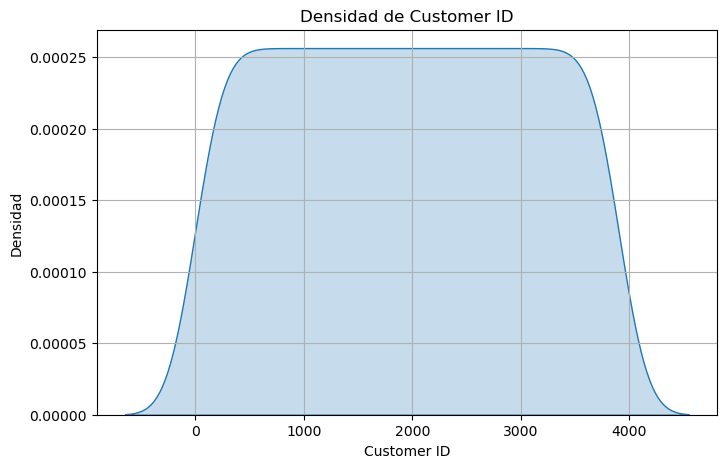

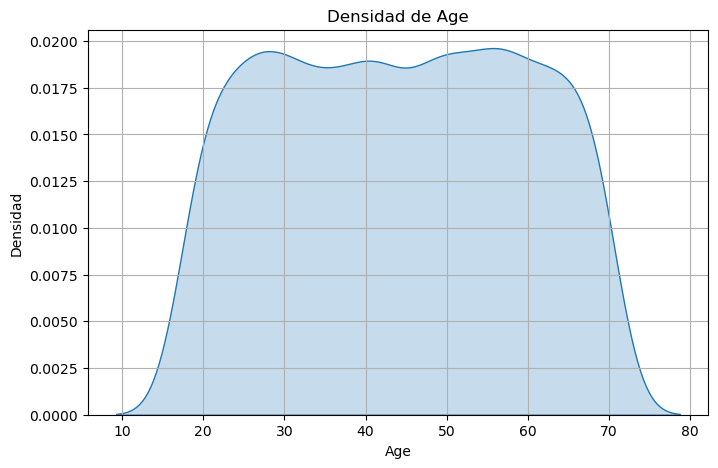

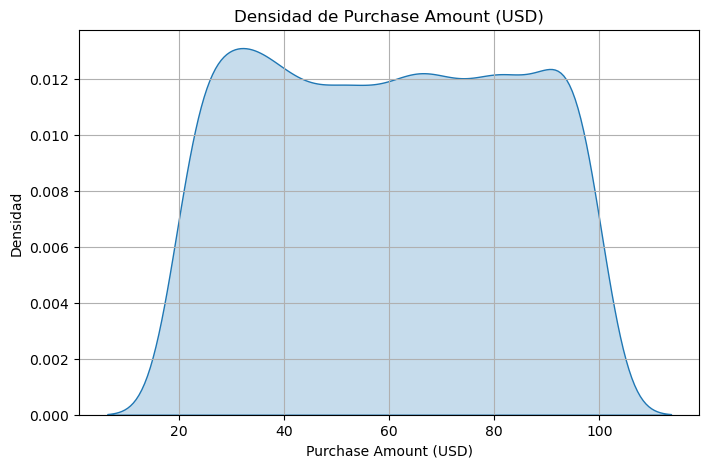

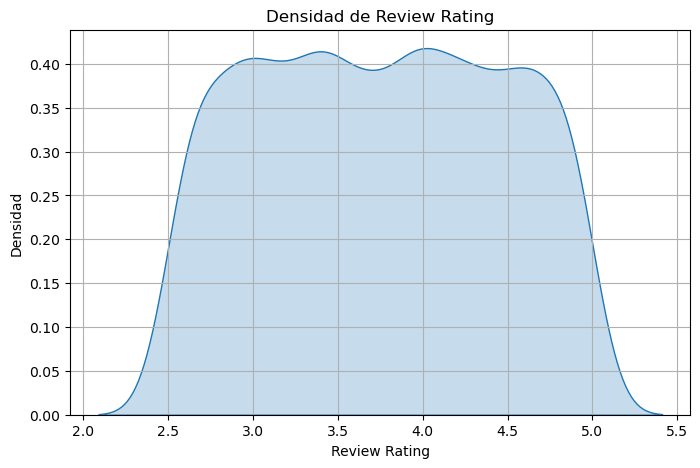

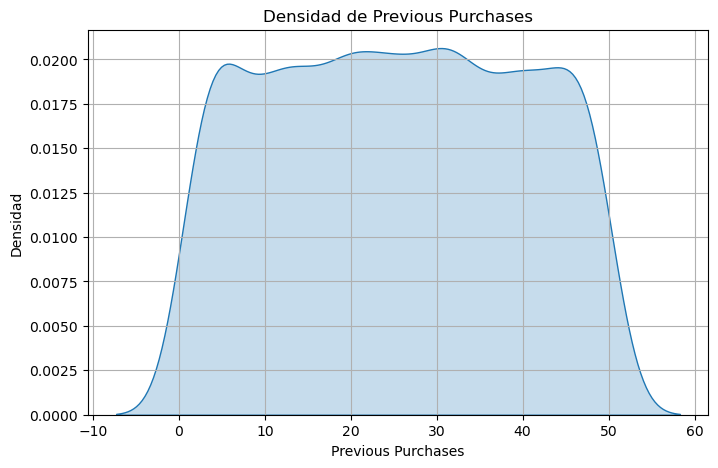

In [3]:
# Visualizamos los primeros datos 

numeric_cols = data.select_dtypes(include=['number']).columns

# Bucle para graficar densidades de columnas numéricas
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data[col], shade=True)
    plt.title(f'Densidad de {col}')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.grid(True)
    plt.show()

Para realizar posteriormente el estudio estadístico, comprobamos la normalidad de los datos de manera visual. En este caso, tendremos en cuenta las variables numéricas. 

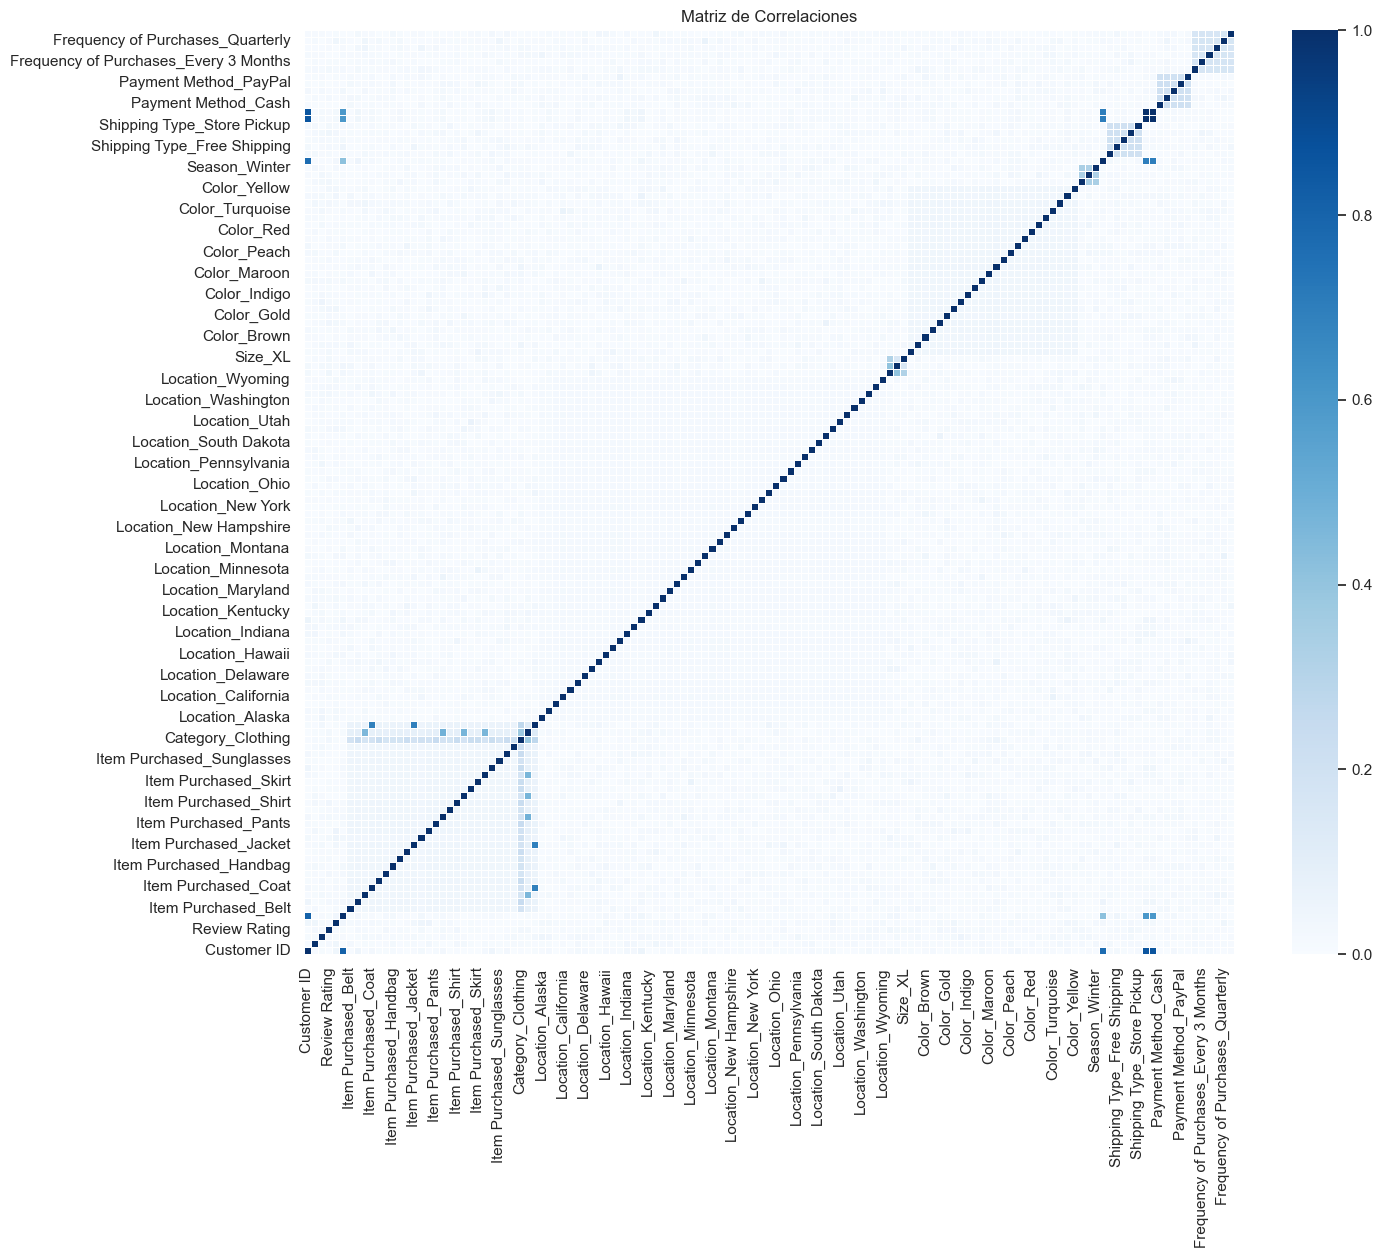

In [96]:
# Convertir columnas categóricas a formato numérico usando codificación one-hot
df_numeric = pd.get_dummies(data, drop_first=True)

# Calcula la matriz de correlaciones para el DataFrame transformado
correlation_matrix = df_numeric.corr().abs()

# Mostramos el heatmap sin anotaciones y con el eje Y invertido
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='Blues', linewidths=0.5, annot=False)
plt.title("Matriz de Correlaciones")
plt.gca().invert_yaxis()  # Invertir eje Y
plt.show()

La matriz de correlaciones es simétrica, por lo que solo se tendrá que observar la mitad superior o inferior para observar las variables con correlaciones entre sí.



In [97]:
# Encuentra las combinaciones con la mayor correlación
# Excluye la diagonal y la parte inferior de la matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
tri_df = correlation_matrix.mask(mask)

# Aplana la matriz y ordena por correlación
pairs = tri_df.unstack().sort_values(ascending=False)

# Imprime las combinaciones con mayor correlación
print("Combinaciones con la mayor correlación:")
for (col1, col2), correlation in pairs.head(30).items():
    print(f"{col1} - {col2}: {correlation:.2f}")

Combinaciones con la mayor correlación:
Discount Applied_Yes - Promo Code Used_Yes: 1.00
Customer ID - Discount Applied_Yes: 0.86
Customer ID - Promo Code Used_Yes: 0.86
Customer ID - Gender_Male: 0.81
Customer ID - Subscription Status_Yes: 0.77
Subscription Status_Yes - Discount Applied_Yes: 0.70
Subscription Status_Yes - Promo Code Used_Yes: 0.70
Item Purchased_Jacket - Category_Outerwear: 0.69
Item Purchased_Coat - Category_Outerwear: 0.69
Gender_Male - Discount Applied_Yes: 0.60
Gender_Male - Promo Code Used_Yes: 0.60
Item Purchased_Sandals - Category_Footwear: 0.49
Item Purchased_Shoes - Category_Footwear: 0.47
Item Purchased_Sneakers - Category_Footwear: 0.46
Item Purchased_Boots - Category_Footwear: 0.46
Gender_Male - Subscription Status_Yes: 0.42
Size_M - Size_S: 0.41
Category_Clothing - Category_Footwear: 0.38
Season_Spring - Season_Winter: 0.34
Season_Spring - Season_Summer: 0.33
Season_Summer - Season_Winter: 0.33
Size_M - Size_XL: 0.32
Category_Clothing - Category_Outerwear

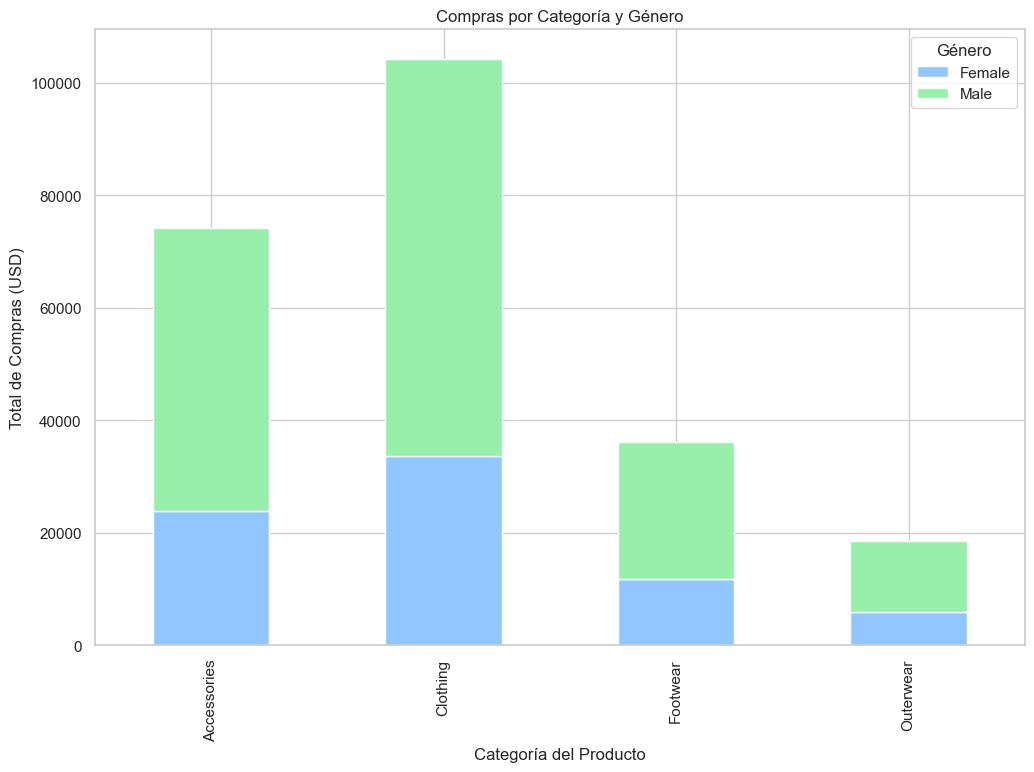

In [98]:
# Agrupa los datos por 'Category' y 'Gender', y calcula la suma de compras en cada grupo.
grouped_data = data.groupby(['Category', 'Gender'])['Purchase Amount (USD)'].sum().unstack(fill_value=0)

# Crea un gráfico de barras apiladas.
fig, ax = plt.subplots(figsize=(12, 8))

grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Personaliza el gráfico.
ax.set_xlabel('Categoría del Producto')
ax.set_ylabel('Total de Compras (USD)')
ax.set_title('Compras por Categoría y Género')
ax.legend(title='Género')

plt.grid(True)
plt.show()

Los hombres tienden a comprar más que las mujeres en todas las categorías presentadas en este gráfico. Además, la categoría de "clothing" es la más popular en ambos sexos.

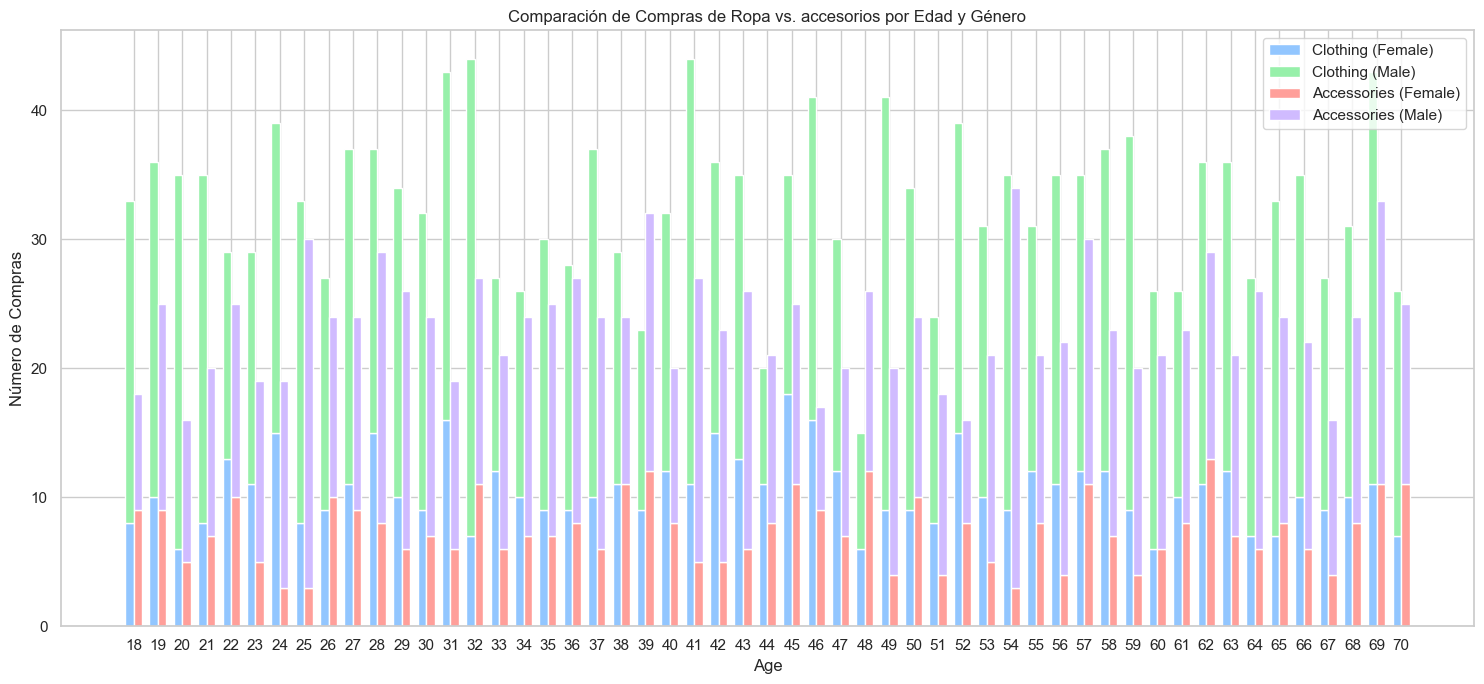

In [99]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Filtramos y contamos las compras de ropa y calzado por edad, género y categoría
grouped = data.groupby(['Age', 'Gender', 'Category']).size().unstack().fillna(0)

# Aplanamos las columnas
grouped = grouped.reset_index()

# Organizamos los datos para el gráfico
ages = grouped['Age'].unique()
clothing_males = grouped[grouped['Gender'] == 'Male']['Clothing'].values
clothing_females = grouped[grouped['Gender'] == 'Female']['Clothing'].values
footwear_males = grouped[grouped['Gender'] == 'Male']['Accessories'].values
footwear_females = grouped[grouped['Gender'] == 'Female']['Accessories'].values

bar_width = 0.35
index = np.arange(len(ages))

# Definimos colores

# Gráfico
fig, ax = plt.subplots(figsize=(15,7))

bar_clothing_females = ax.bar(index, clothing_females, bar_width, label='Clothing (Female)')
bar_clothing_males = ax.bar(index, clothing_males, bar_width, bottom=clothing_females, label='Clothing (Male)')
bar_footwear_females = ax.bar(index + bar_width, footwear_females, bar_width, label='Accessories (Female)')
bar_footwear_males = ax.bar(index + bar_width, footwear_males, bar_width, bottom=footwear_females, label='Accessories (Male)')

ax.set_xlabel('Age')
ax.set_ylabel('Número de Compras')
ax.set_title('Comparación de Compras de Ropa vs. accesorios por Edad y Género')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(ages)
ax.legend()

plt.tight_layout()
plt.show()

En este caso, hemos seleccionado las dos categorías más populares (ropa y accesorios) y vemos que en ambas hay una tendencia a la estabilidad en la compra de ropa y accesorios a medida que la edad aumenta.

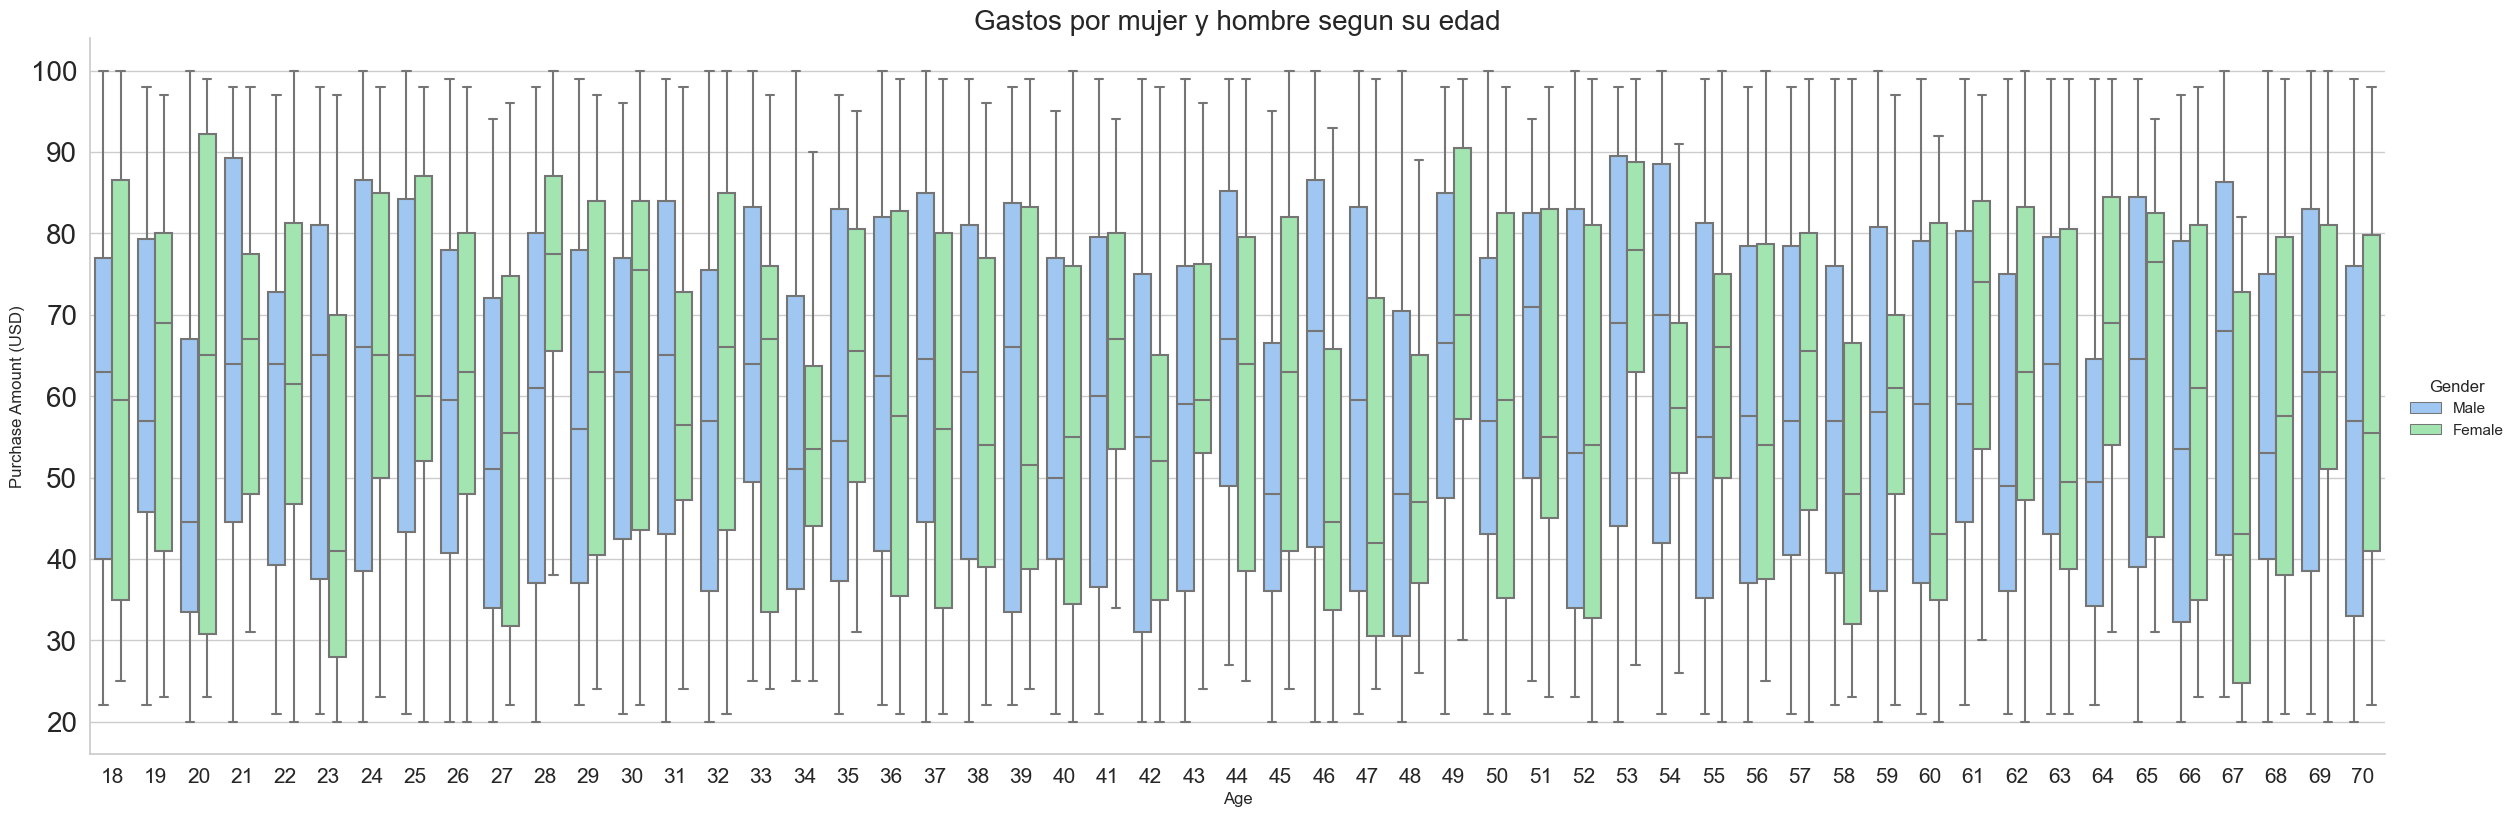

In [100]:
# Dibuja el catplot
g = sns.catplot(y = 'Purchase Amount (USD)', x = 'Age', hue = 'Gender', kind = 'box', data = data, height=8, aspect=3)

# Ajusta el tamaño de fuente de los ejes y el título
g.ax.tick_params(axis='x', labelsize=15)
g.ax.tick_params(axis='y', labelsize=20)
g.ax.set_title('Gastos por mujer y hombre segun su edad', size=20)

plt.show()

A través de los diferentes grupos de edad, no parece haber una tendencia clara de aumento o disminución en el gasto.

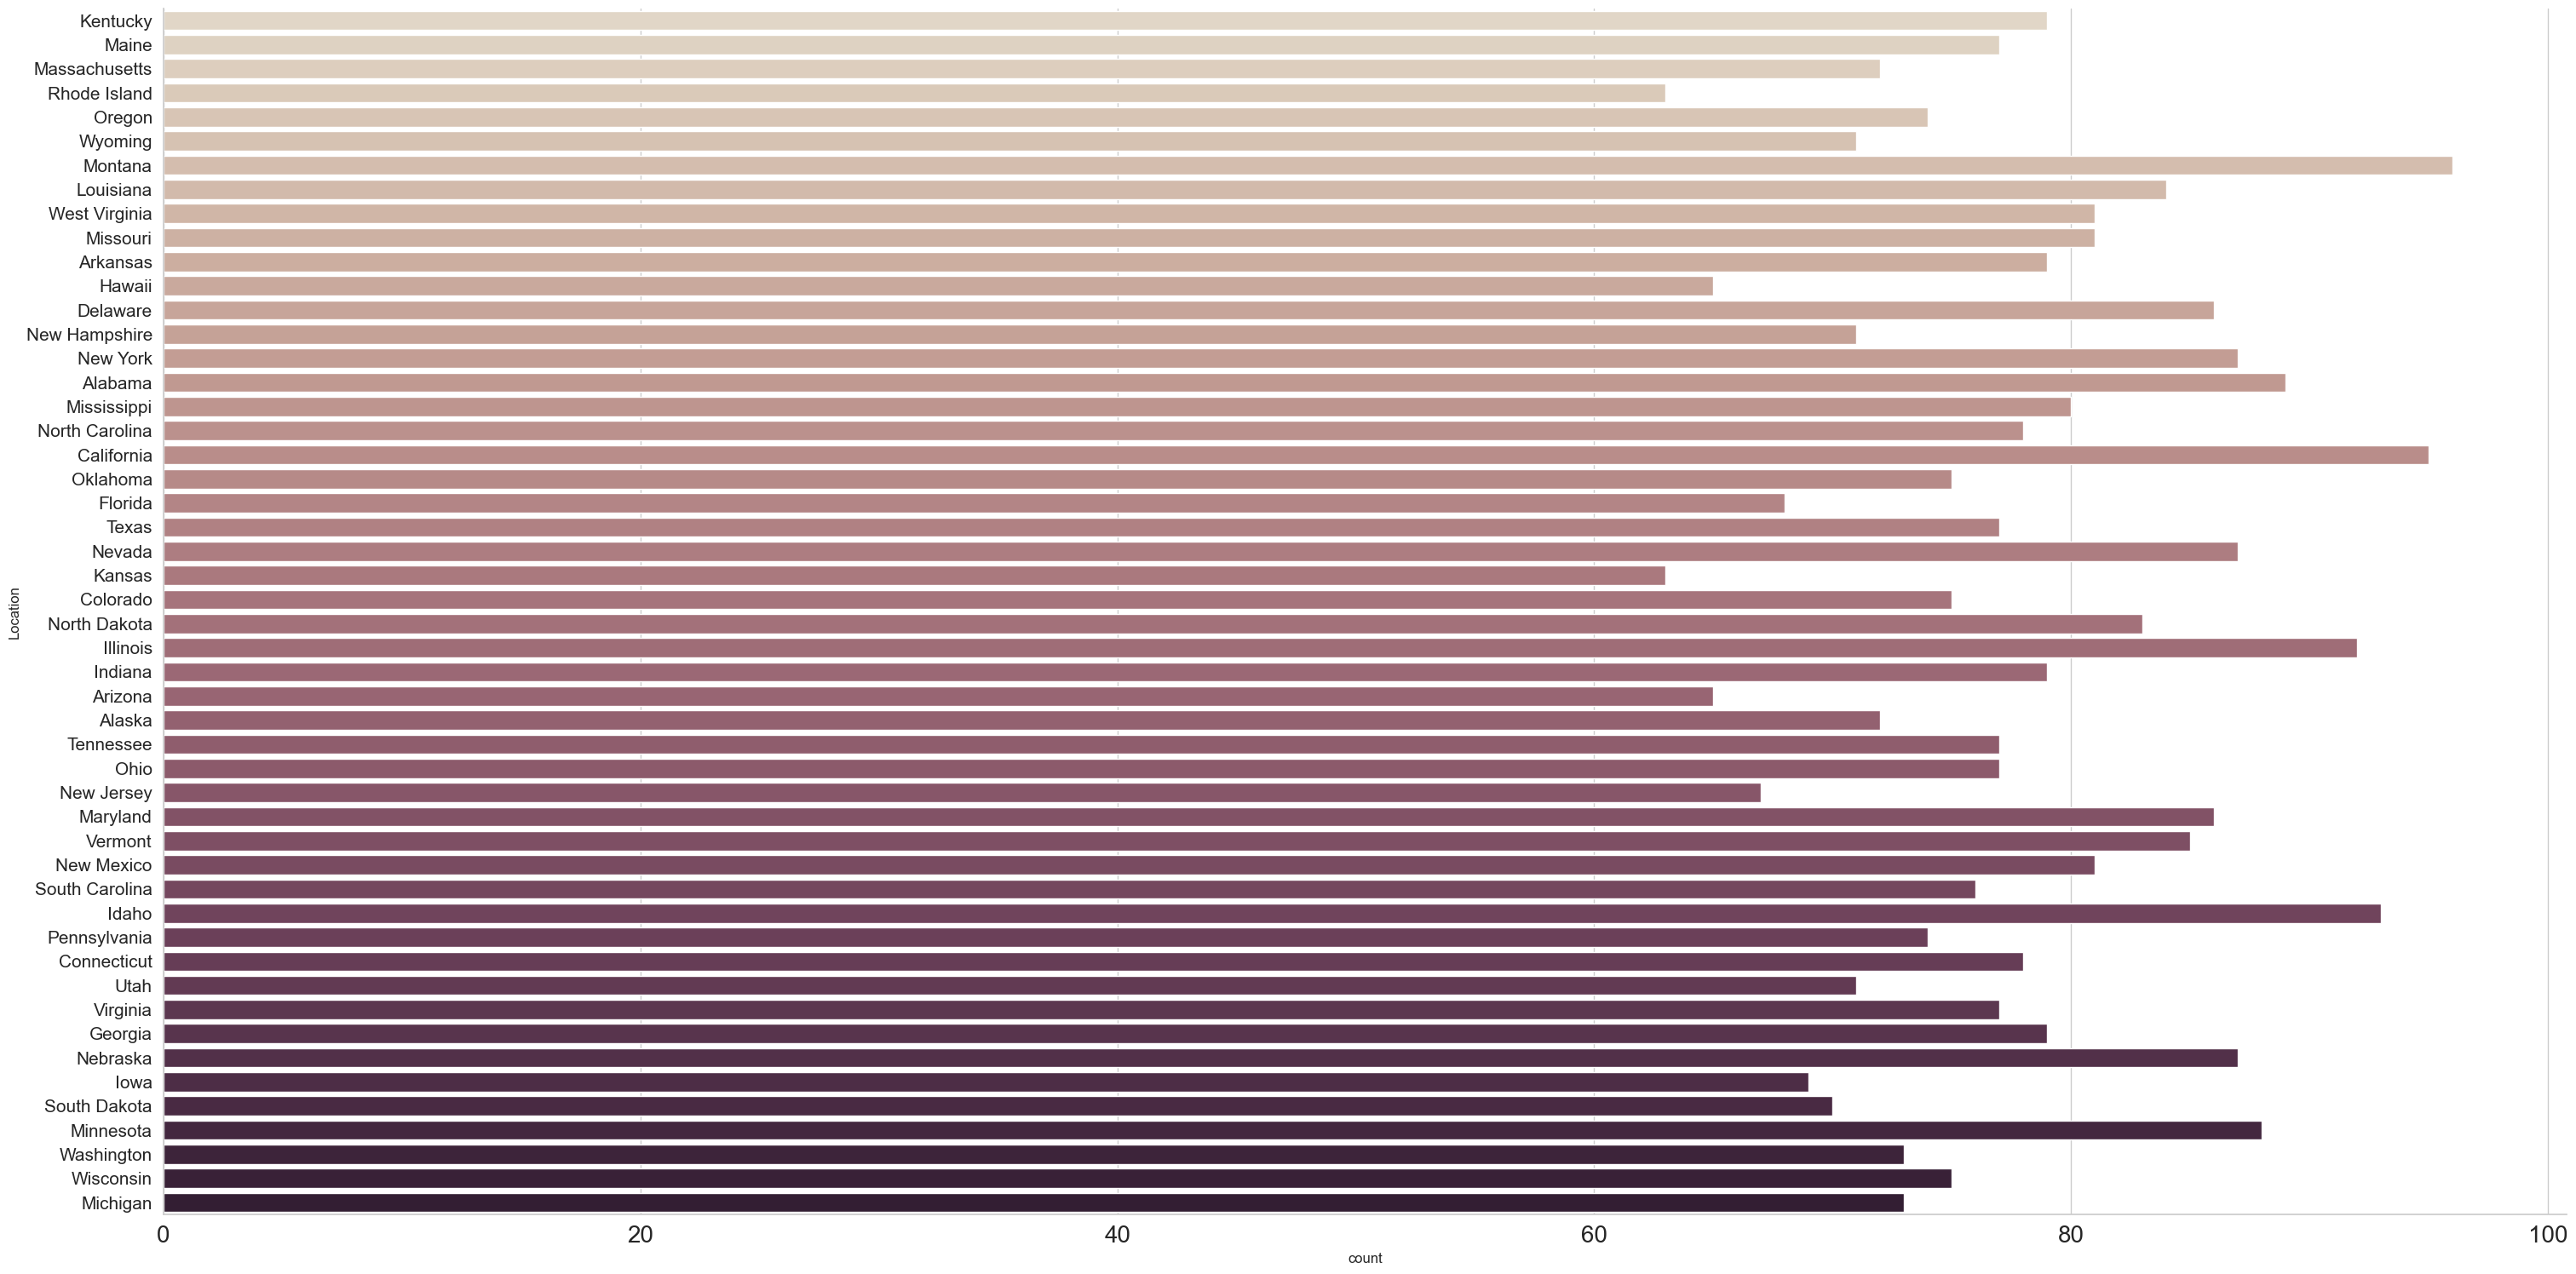

In [101]:
sns.catplot(y='Location', kind='count', palette='ch:.25', data=data, orient='h', height=15, aspect=2)
ax = plt.gca()
ax.tick_params(axis='y', labelsize=15)  # Tamaño de fuente para el eje y
ax.tick_params(axis='x', labelsize=20)  # Tamaño de fuente para el eje x (opcional si deseas cambiar el tamaño)

Algunos de los estados con los recuentos más altos, basándonos en las barras más largas, incluyen: "Michigan", "Wisconsin", "Minnesota", entre otros. Por otro lado, estados como "Kentucky", "Maine", "Massachusetts" tienen recuentos más bajos, ya que sus barras son más cortas.

Este gráfico es útil para obtener una visión rápida de cómo se distribuye una determinada métrica o conjunto de datos entre diferentes estados.

Text(0.5, 1.0, 'Gasto por cada talla de prenda según mujer y hombre')

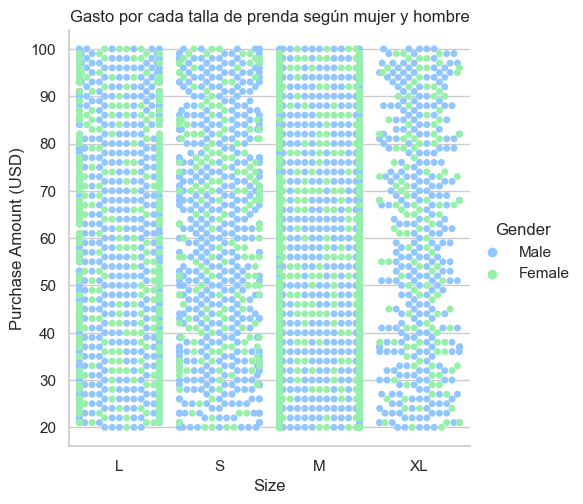

In [102]:
sns.catplot(x="Size", y= 'Purchase Amount (USD)', hue="Gender", kind="swarm", data=data)
plt.title('Gasto por cada talla de prenda según mujer y hombre')

In [103]:
for i in data['Size'].unique():
    print(i)
    print(data[data['Size'] == i].value_counts().sum())

L
1053
S
663
M
1755
XL
429


Este gráfico muestra el gasto en USD por cada talla de prenda según el género (mujer y hombre). La presentación utiliza un tipo de gráfico conocido como "swarm plot".

Se puede observar que la talla "M" tiene una mayor densidad de puntos, lo que indica que es la talla más comrpada tanto por hombres como por mujeres. Por el contrario, las tallas "S" y "XL" tienen menos puntos en comparación con "L" y "M", lo que sugiere que estas tallas son menos populares.

No hay una diferencia significativa en el gasto entre hombres y mujeres para las distintas tallas, ya que los puntos verdes y azules están bastante mezclados en cada categoría.



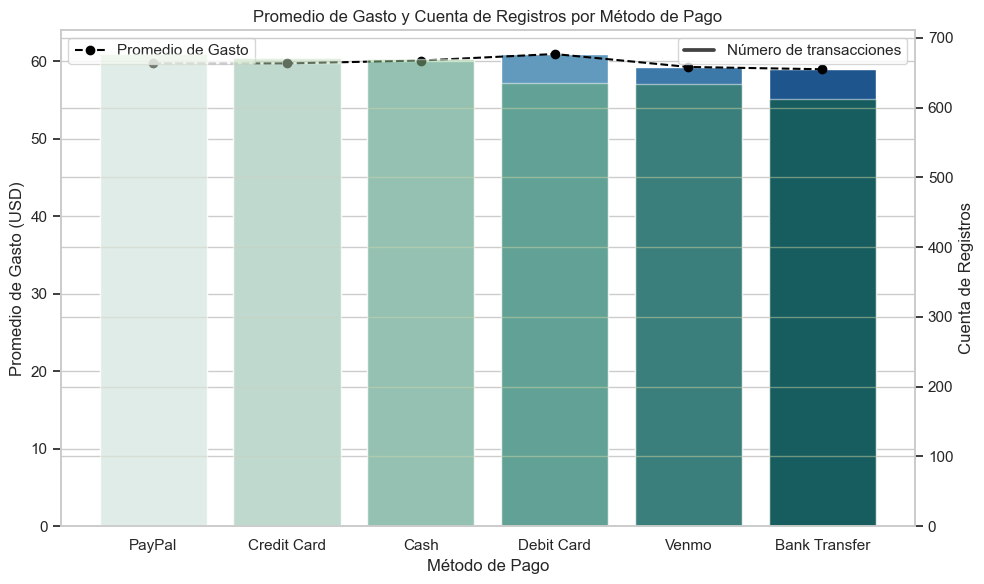

In [104]:
# Calculamos el promedio de gasto por método de pago
averages = data.groupby('Payment Method')['Purchase Amount (USD)'].mean()

# Calculamos el recuento de registros por método de pago
counts = data['Payment Method'].value_counts()

# Crear un gráfico de barras para el promedio de gasto en el eje izquierdo
plt.figure(figsize=(10, 6))
ax1 = plt.gca()  # Eje izquierdo

sns.barplot(x=averages.index, y=averages.values, palette="Blues", ax=ax1)
ax2 = ax1.twinx()  # Crea un eje adicional en el lado derecho
sns.barplot(x=counts.index, y=counts.values, ax=ax2, alpha=0.5, palette="Greens")

# Configurar el eje izquierdo
ax1.set_ylabel('Promedio de Gasto (USD)')
ax1.set_xlabel('Método de Pago')

# Configurar el eje derecho
ax2.set_ylabel('Cuenta de Registros')
ax2.set_xlabel('Método de Pago')

# Agregar una línea que represente el promedio de gasto al eje izquierdo
ax1.plot(range(len(averages)), averages.values, marker='o', linestyle='--', color='black', label='Promedio de Gasto')

# Personalizar el gráfico
plt.title('Promedio de Gasto y Cuenta de Registros por Método de Pago')
ax1.legend(loc="upper left")
ax2.legend(["Número de transacciones"], loc="upper right")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En general, el gráfico ofrece una visión combinada del comportamiento de los usuarios en función del método de pago, permitiendo a las empresas o investigadores identificar patrones y tomar decisiones basadas en estos insights.

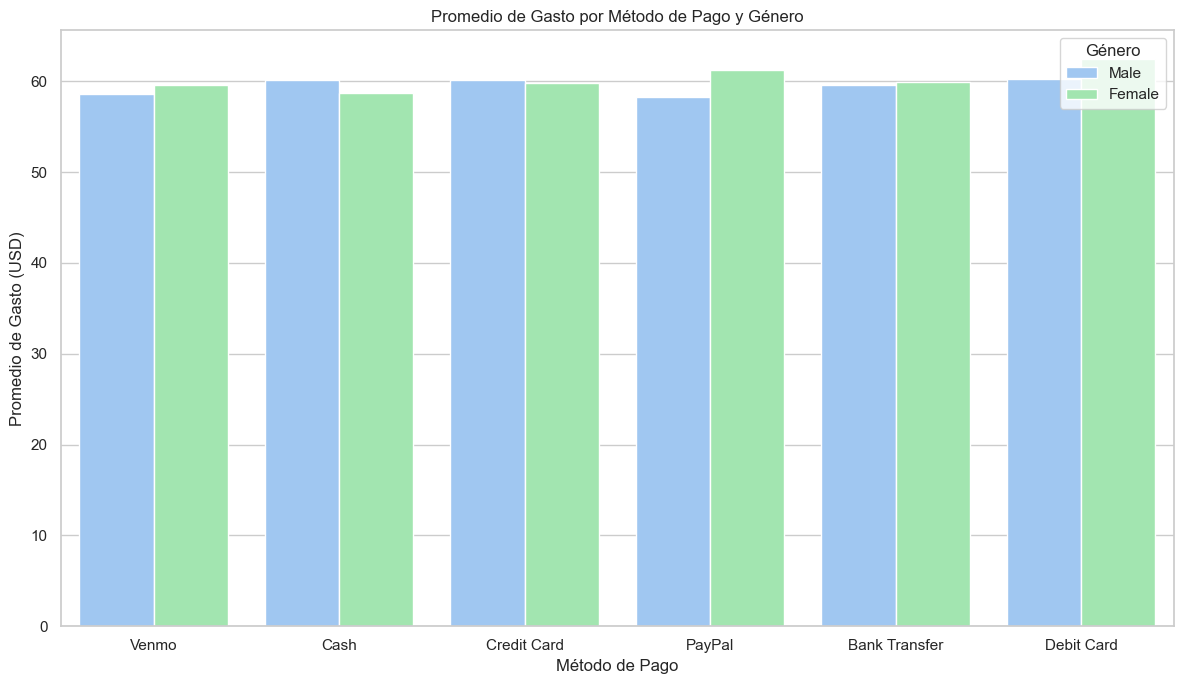

In [105]:
# Crear un gráfico de barras agrupadas
plt.figure(figsize=(12, 7))

# Usar seaborn para generar el gráfico
sns.barplot(x='Payment Method', y='Purchase Amount (USD)', hue='Gender', data=data, ci=None)

# Personalizar el gráfico
plt.title('Promedio de Gasto por Método de Pago y Género')
plt.ylabel('Promedio de Gasto (USD)')
plt.xlabel('Método de Pago')
plt.legend(title='Género')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Uniformidad en los gastos: Independientemente del método de pago utilizado, los gastos promedio entre hombres y mujeres son sorprendentemente similares. Esto sugiere que el género no es un factor determinante en la cantidad promedio gastada usando estos métodos.



In [106]:
df1 = data
df1['Gender'] = df1['Gender'].replace({'Male':'Female', 'Female': 'Male'})

In [107]:
items_sell = df1.groupby(['Item Purchased', 'Gender'])['Item Purchased'].count()
print(items_sell)

Item Purchased  Gender
Backpack        Female    106
                Male       37
Belt            Female    106
                Male       55
Blouse          Female    105
                Male       66
Boots           Female     94
                Male       50
Coat            Female    114
                Male       47
Dress           Female    114
                Male       52
Gloves          Female    103
                Male       37
Handbag         Female     95
                Male       58
Hat             Female    102
                Male       52
Hoodie          Female    100
                Male       51
Jacket          Female    109
                Male       54
Jeans           Female     95
                Male       29
Jewelry         Female    119
                Male       52
Pants           Female    123
                Male       48
Sandals         Female    101
                Male       59
Scarf           Female    112
                Male       45
Shirt           F

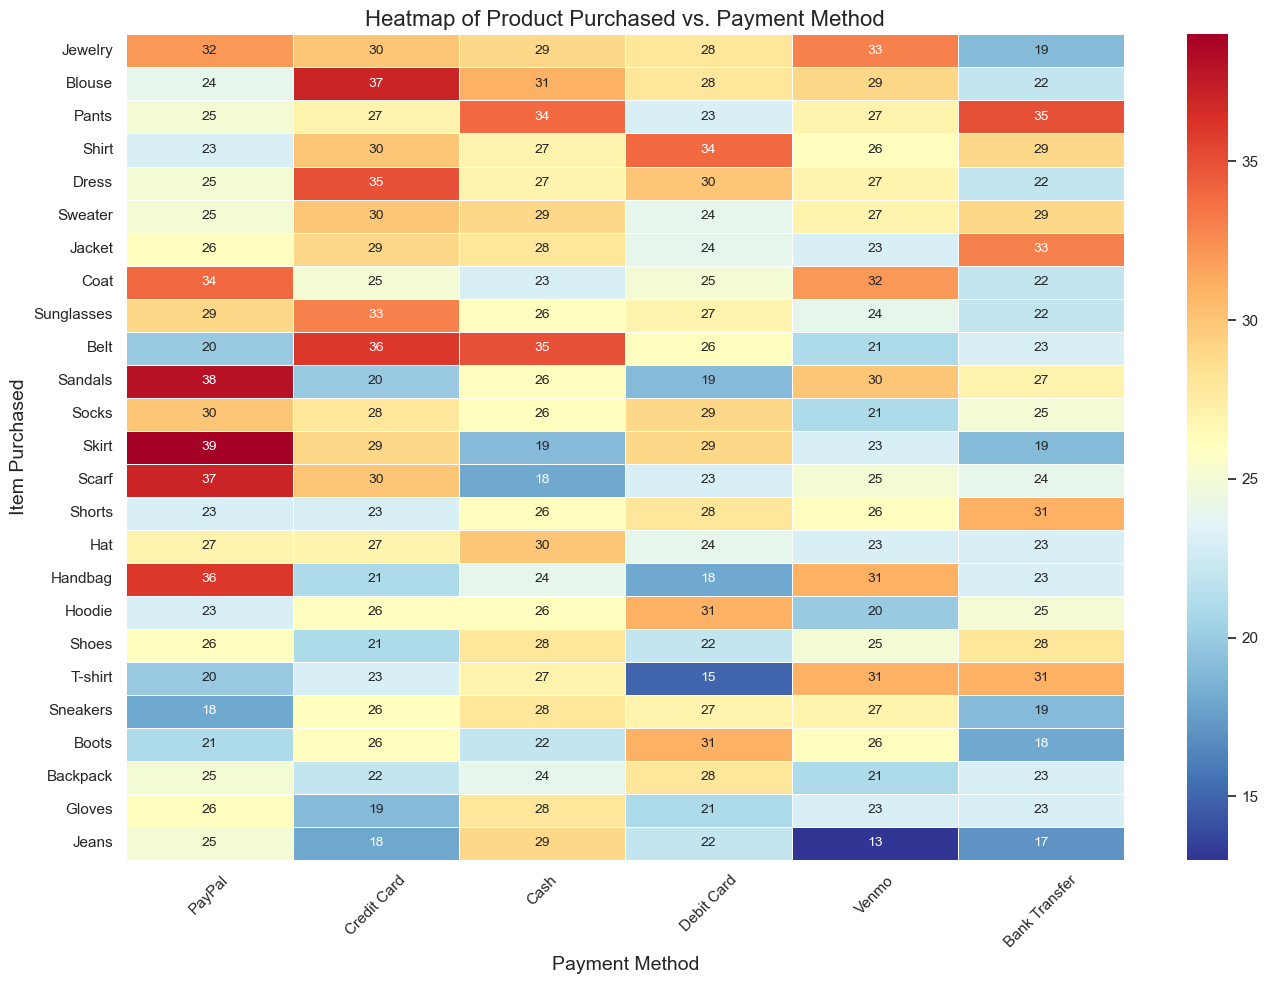

In [109]:
# Ordenar el DataFrame según la suma total de filas y columnas
product_payment_pivot = data.pivot_table(index='Item Purchased', columns='Payment Method', aggfunc='size', fill_value=0)

sorted_columns = product_payment_pivot.sum().sort_values(ascending=False).index
sorted_rows = product_payment_pivot.sum(axis=1).sort_values(ascending=False).index
product_payment_pivot = product_payment_pivot.reindex(sorted_rows, axis=0).reindex(sorted_columns, axis=1)

# Configurar el gráfico
plt.figure(figsize=(14, 10))

# Crear el mapa de calor
sns.heatmap(product_payment_pivot, cmap='RdYlBu_r', annot=True, fmt='d', linewidths=0.5, linecolor='white', annot_kws={'size':10})

# Establecer el título y las etiquetas
plt.title('Heatmap of Product Purchased vs. Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Item Purchased', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El mapa de calor ilustra claramente las tendencias de compra de diferentes productos según el método de pago. PayPal y las tarjetas de crédito son los métodos más populares en general, siendo utilizados frecuentemente para la mayoría de los productos. 

Este gráfico proporciona una visión valiosa de las preferencias de los consumidores, que puede ser esencial para las estrategias de marketing y ventas de un negocio. Es crucial para las empresas estar al tanto de estas tendencias para adaptar sus ofertas, promociones y facilitar métodos de pago que se alineen con las preferencias del cliente.



<Figure size 2000x1400 with 0 Axes>

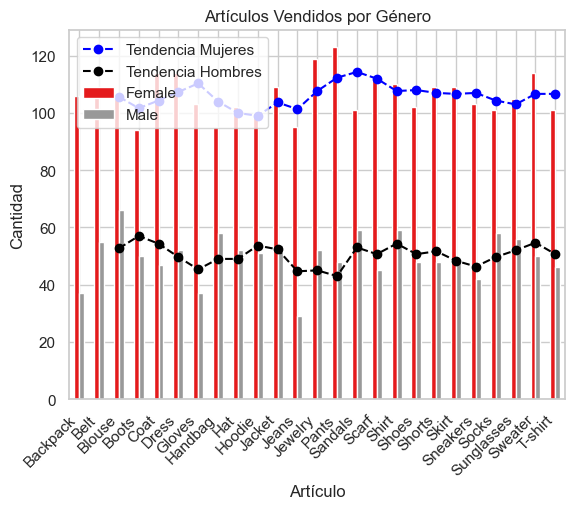

In [110]:
df2 = data.groupby(['Item Purchased', 'Gender'])['Item Purchased'].count().unstack()

# Crear un gráfico de barras apiladas
plt.figure(figsize=(20, 14))
df2.plot(kind='bar', stacked=False, colormap='Set1')
plt.title('Artículos Vendidos por Género')
plt.xlabel('Artículo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

# Calcular y trazar líneas de tendencia separadas para hombres y mujeres
tendencia_mujeres = df2['Female'].rolling(window=3).mean()
tendencia_hombres = df2['Male'].rolling(window=3).mean()
plt.plot(tendencia_mujeres, label='Tendencia Mujeres', marker='o', linestyle='--', color='blue')
plt.plot(tendencia_hombres, label='Tendencia Hombres', marker='o', linestyle='--', color='black')

# Personalizar el gráfico
plt.legend()
plt.show()

El gráfico visualiza la cantidad de artículos vendidos según el género del comprador y compara las tendencias generales de compra para hombres y mujeres. 

Las líneas de tendencia, representadas por líneas discontinuas, indican las tendencias generales de compra para ambos géneros. La línea azul (Tendencia Mujeres) muestra una fluctuación menor en comparación con la línea negra (Tendencia Hombres), lo que sugiere que las compras de mujeres son más consistentes a través de diferentes artículos.

Las líneas de tendencia sugieren que aunque hay artículos que son consistentemente populares entre ambos géneros, también hay ciertos productos que ven picos o caídas en las ventas, dependiendo del género.

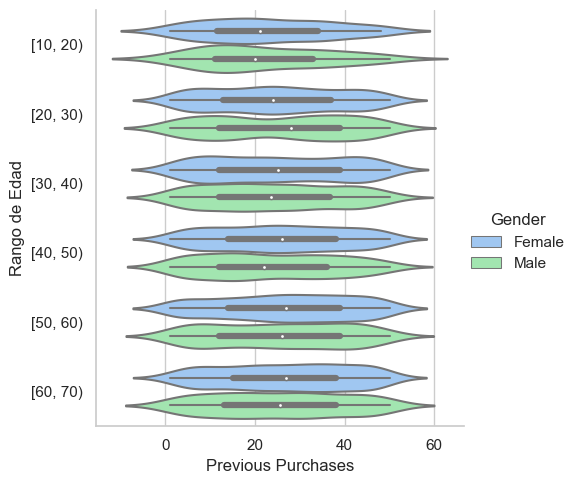

In [111]:
limites_edades = list(range(10, 80 , 10))  # Desde 0 hasta 100, de 10 en 10

# Creamos una copia del dataframe
df3 = data.copy()

# Creamos una nueva columna agrupando las edades de 10 en 10 
df3['Rango de Edad'] = pd.cut(data['Age'], bins=limites_edades, right=False)

# Creamos un grafico de violin para todas las edades separado por género
sns.catplot(x='Previous Purchases', y='Rango de Edad', kind='violin', hue = 'Gender', data=df3)

El gráfico visualiza la distribución de las compras previas basadas en el rango de edad y el género.

En cada rango de edad, la distribución de compras previas para hombres y mujeres es bastante similar. Es decir, no hay una gran disparidad entre los géneros en cuanto a la cantidad de compras previas en ningún rango de edad.

Para la mayoría de los rangos de edad, la mayor concentración de compras previas se encuentra en el rango medio, alrededor de 20 a 40 compras.


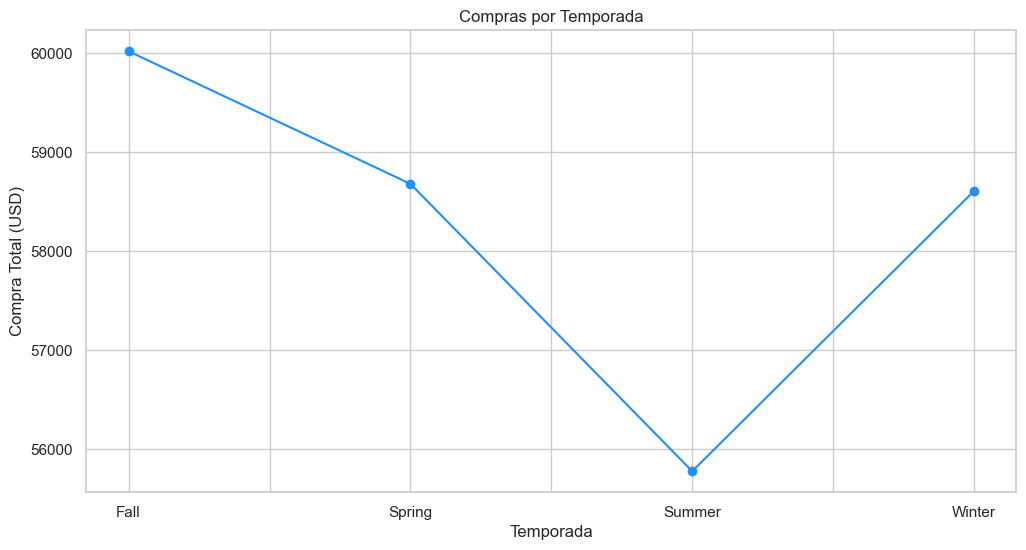

In [112]:
# Agrupa los datos por 'Season' y calcula la suma de compras en cada temporada.
season_data = data.groupby('Season')['Purchase Amount (USD)'].sum()

# Crea un gráfico de línea
plt.figure(figsize=(12, 6))
season_data.plot(marker='o', linestyle='-', color='dodgerblue')
plt.xlabel('Temporada')
plt.ylabel('Compra Total (USD)')
plt.title('Compras por Temporada')
plt.grid(True)
plt.show()

Al analizar las ventas a lo largo de una temporada completa, hemos podido identificar diferencias significativas en el desempeño de ventas durante cada estación.

Es evidente que durante el verano, las ventas experimentan una disminución, registrando un volumen menor en comparación con las otras estaciones. Por otro lado, el otoño se destaca como la estación con el mayor volumen de ventas, lo que indica un aumento significativo en la demanda de productos durante ese período

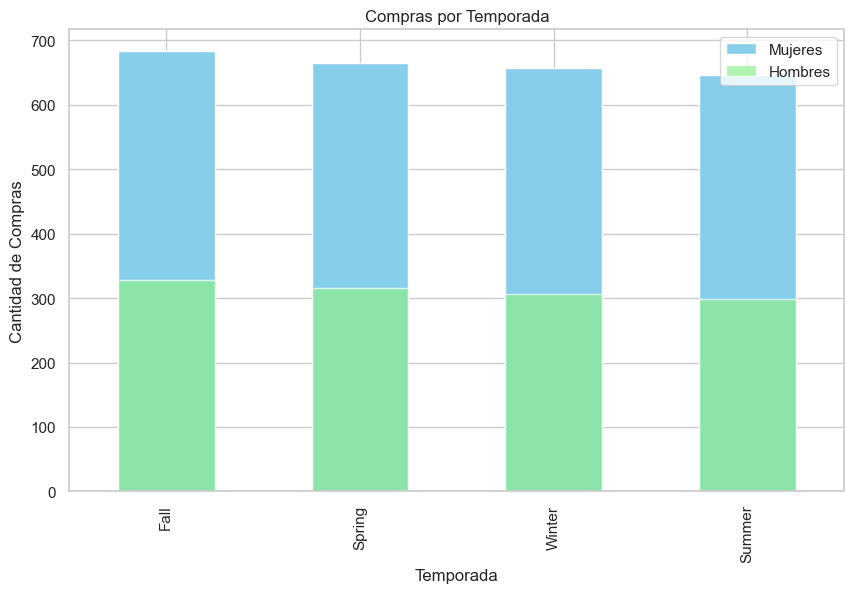

In [113]:
# Crear un gráfico de barras para compras por temporada para mujeres y hombres
plt.figure(figsize=(10, 6))

compras_por_temporada_mujeres = data[data['Gender'] == 'Female']['Season'].value_counts()
compras_por_temporada_hombres = data[data['Gender'] == 'Male']['Season'].value_counts()

compras_por_temporada_mujeres.plot(kind='bar', color='skyblue', label='Mujeres')
compras_por_temporada_hombres.plot(kind='bar', color='lightgreen', label='Hombres', alpha=0.7)

plt.title('Compras por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Cantidad de Compras')
plt.legend()

# Mostrar el gráfico
plt.show()

Continuamos con el estudio anterior, pero diferenciando el volumen de compras por género.

En este caso podemos observar que este volumen se encuentra distribuido de manera altamente equitativa entre géneros.

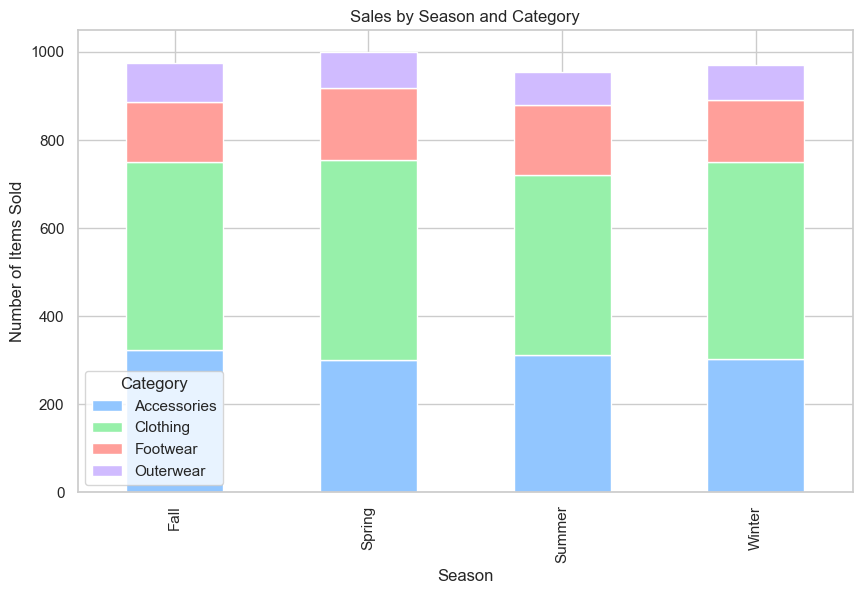

In [114]:
# Agrupar por Season y Category y contar las entradas
grouped = data.groupby(['Season', 'Category']).size().unstack().fillna(0)

# Representar gráficamente
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sales by Season and Category')
plt.ylabel('Number of Items Sold')
plt.show()

Tendencias de compra por temporada: En términos de cantidad total de compras (en USD), se observa una disminución notable en la primavera y un mínimo durante el verano. Esta tendencia se invierte en invierno, donde las compras aumentan sustancialmente.

Comportamiento de compra por género: Las mujeres tienden a comprar consistentemente más que los hombres en todas las temporadas. Esta tendencia es evidente y se mantiene en todas las estaciones del año.

Tendencias de ventas por categoría de producto: Al observar el tercer gráfico, queda claro que la categoría de "Outwear" es la más vendida en todas las temporadas. Las ventas de "Footwear" (calzado) y "Clothing" también son notables y mantienen una proporción similar durante todo el año. Los accesorios, por otro lado, parecen tener una participación menor en las ventas totales.

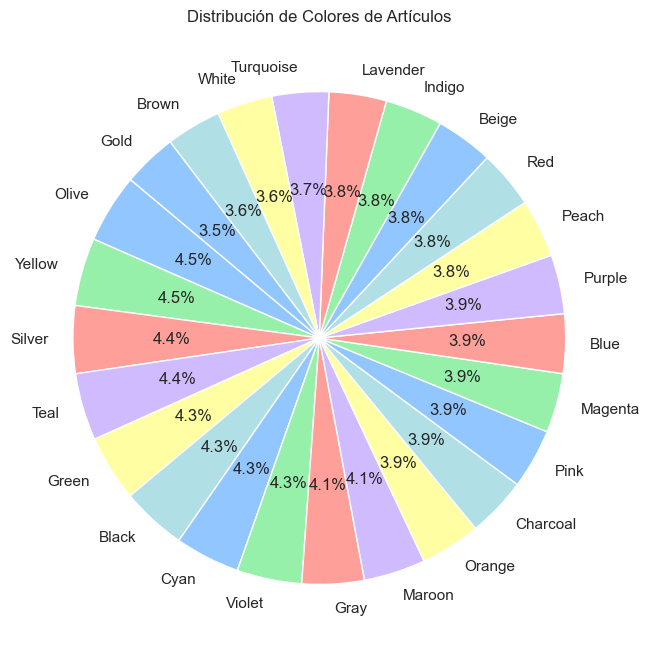

In [115]:
colores = data['Color'].value_counts()

# Crear un gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(colores, labels=colores.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Colores de Artículos')

# Mostrar el gráfico
plt.show()

Al analizar la relación entre la cantidad de colores y la cantidad de artículos, observamos una distribución bastante equitativa.

In [116]:
import plotly.graph_objects as go

pagos_gastos = data.groupby('Payment Method')['Purchase Amount (USD)'].sum().reset_index()

# Crea un objeto figura de Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=pagos_gastos['Payment Method']
    ),
    link=dict(
        source=[0] * len(pagos_gastos),  # Todas las fuentes comienzan en el nodo 0
        target=list(range(1, len(pagos_gastos) + 1)),  # Destinos numerados de 1 a n
        value=pagos_gastos['Purchase Amount (USD)']
    )
))

# Personaliza el diseño del gráfico de Sankey
fig.update_layout(title_text="Métodos de Pago vs. Cantidad Gastada")
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))

# Muestra el gráfico interactivo
fig.show()

En este diagrama de serpiente (Snakey Diagram), se presentan los diferentes métodos de pago utilizados para realizar compras.

Para visualizar el gasto total asociado a cada método de pago, colocamos el cursor sobre las líneas grises correspondientes. Observamos que el método de pago más frecuente es la tarjeta de débito, en contraste, el método menos utilizado es el efectivo (cash).

interactive(children=(Dropdown(description='Género:', options=('Male', 'Female'), value='Male'), Dropdown(desc…

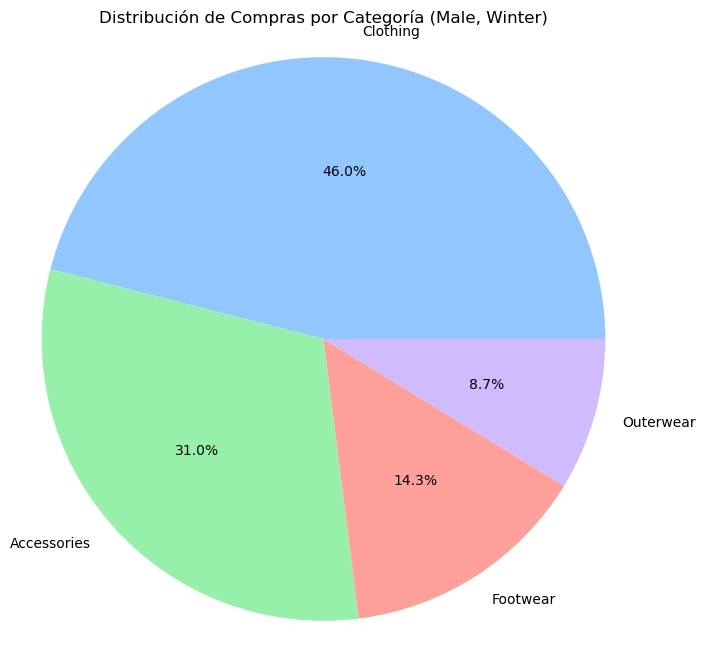

<function IPython.core.display_functions.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, raw=False, clear=False, **kwargs)>

In [2]:
# Crear una función para actualizar el gráfico de tarta con filtros
def update_pie_chart(gender, season):
    filtered_data = data[(data['Gender'] == gender) & (data['Season'] == season)]
    category_counts = filtered_data['Category'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    plt.title(f'Distribución de Compras por Categoría ({gender}, {season})')
    plt.axis('equal')
    plt.show()

# Crear widgets interactivos
gender_widget = widgets.Dropdown(options=data['Gender'].unique(), description='Género:')
season_widget = widgets.Dropdown(options=data['Season'].unique(), description='Temporada:')

# Crear la interfaz interactiva
interact(update_pie_chart, gender=gender_widget, season=season_widget)

# Mostrar el gráfico inicial
update_pie_chart(data['Gender'].unique()[0], data['Season'].unique()[0])

display

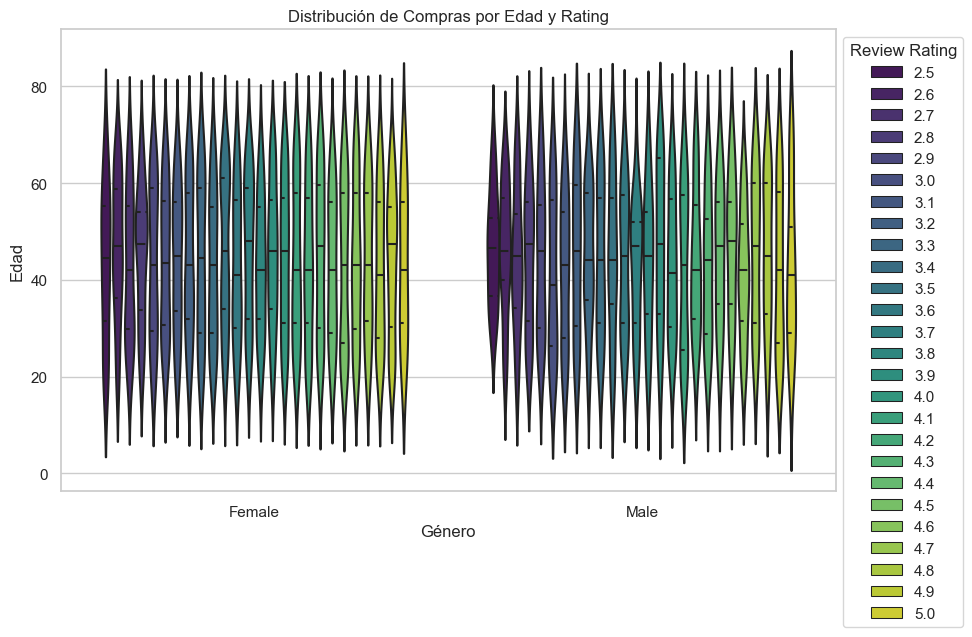

In [118]:
sns.set(style="whitegrid")

# Crear un diagrama de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x="Gender", y="Age", hue="Review Rating", data=data, inner="quart", palette="viridis")

# Agregar leyenda
plt.legend(title="Review Rating", loc="upper left", bbox_to_anchor=(1, 1))

# Personalizar etiquetas y título
plt.xlabel("Género")
plt.ylabel("Edad")
plt.title("Distribución de Compras por Edad y Rating")

plt.show()

Tanto hombres como mujeres presentan una amplia distribución de edades al hacer compras. La densidad de estas distribuciones indica que hay ciertas edades donde se concentran más compras.

Las calificaciones de reseñas varían ampliamente, lo que sugiere que las experiencias de compra de los clientes son mixtas. No parece haber una correlación clara y directa entre la edad y la calificación de la reseña, pero hay ciertos rangos de edad donde las calificaciones tienden a ser más altas o más bajas.

Aunque hay similitudes en los patrones de compra entre hombres y mujeres, las calificaciones de las reseñas varían, sugiriendo experiencias de compra distintas entre los diferentes grupos de edad y género.

In [119]:
# Crea un gráfico de Sankey
fig = px.sunburst(data, path=['Payment Method', 'Category'], values='Purchase Amount (USD)')
fig.update_layout(title_text='Gráfico de Sankey de Métodos de Pago y Categorías de Productos')
fig.show()

El gráfico circular representa la distribución de cada tipo de pago en función del gasto total para cada categoría.

Notamos que, independientemente del método de pago, la distribución del gasto es bastante equilibrada, siendo la categoría de ropa la que registra el mayor gasto en general.

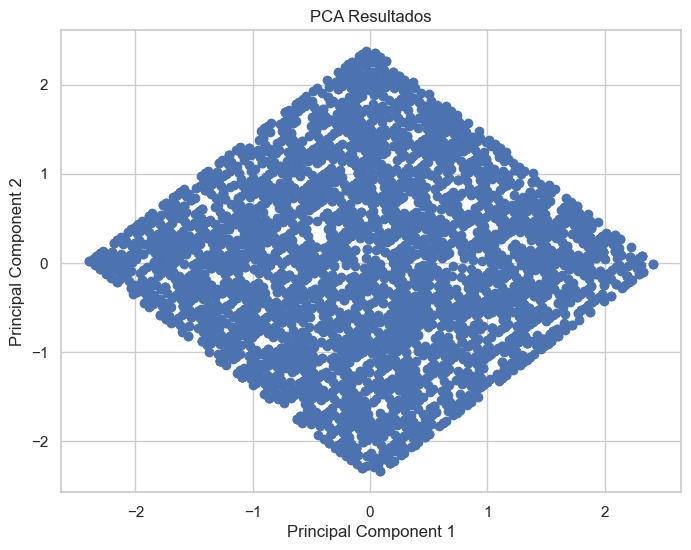

In [120]:
# Selecciona las variables numéricas para la PCA (por ejemplo, 'Age', 'Purchase Amount (USD)', 'Review Rating', etc.).
numeric_data = data[['Age', 'Purchase Amount (USD)']]

# Realiza la estandarización de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Aplica PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Crea un nuevo DataFrame con los resultados de PCA
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])

# Visualiza los resultados
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Resultados')
plt.show()

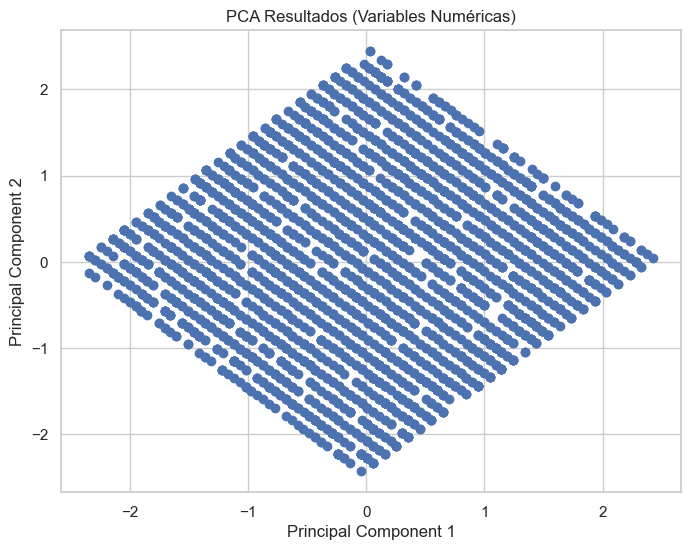

In [121]:
# Selecciona las variables numéricas para la PCA.
numeric_data = data[['Review Rating', 'Previous Purchases']]

# Realiza la estandarización de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Aplica PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Crea un nuevo DataFrame con los resultados de PCA
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])

# Visualiza los resultados
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Resultados (Variables Numéricas)')
plt.show()

Al ver los resultados, se puede observar que muestra una dispersión de puntos que parece formar un patrón en forma de diamante. Este patrón sugiere que no hay una separación clara entre grupos dentro del conjunto de datos según estas dos variables.

Posteriormente, se llevó a cabo un segundo PCA, esta vez seleccionando otras variables numéricas, específicamente "Review Rating" y "Previous Purchases". La visualización resultante de este segundo PCA es notablemente diferente. Se observa una disposición más estructurada y lineal de los puntos. A diferencia de la primera visualización, los puntos en este gráfico se alinean en líneas diagonales bien definidas.



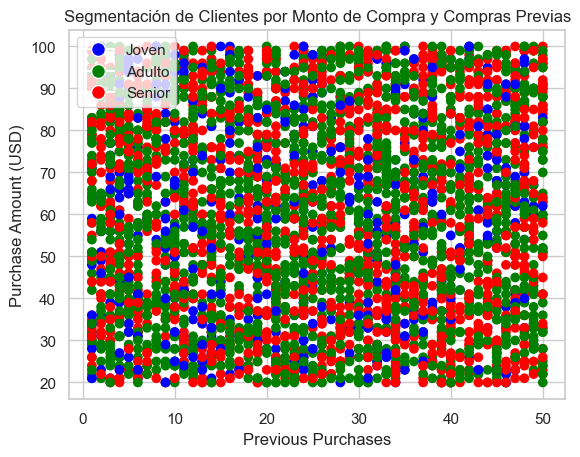

In [122]:
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Función para categorizar la edad
def categorize_age(age):
    if age < 25:
        return 'Joven'
    elif 25 <= age <= 50:
        return 'Adulto'
    else:
        return 'Senior'

# Aplicar la función a la columna de edad
data['Age Group'] = data['Age'].apply(categorize_age)

# Preparar datos para el clustering
features = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']
X = data[features]

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Usar K-Means para segmentar clientes
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)
data['Cluster'] = kmeans.labels_

# Visualizar la segmentación en un gráfico
colors = {'Joven': 'blue', 'Adulto': 'green', 'Senior': 'red'}
plt.scatter(data['Previous Purchases'], data['Purchase Amount (USD)'], c=data['Age Group'].apply(lambda x: colors[x]))
plt.title('Segmentación de Clientes por Monto de Compra y Compras Previas')
plt.xlabel('Previous Purchases')
plt.ylabel('Purchase Amount (USD)')

# Crear leyenda
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Joven', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='Adulto', markersize=10, markerfacecolor='green'),
                   Line2D([0], [0], marker='o', color='w', label='Senior', markersize=10, markerfacecolor='red')]

plt.legend(handles=legend_elements, loc='upper left')
plt.show()

Los puntos de todos los grupos de edad están distribuidos de manera bastante uniforme en todo el gráfico. Esto indica que los tres grupos de edad presentan patrones similares en cuanto al número de compras previas y la cantidad de compra.

Independientemente del número de compras previas (ya sean pocas o muchas), clientes de todos los grupos de edad realizan compras de diferentes cantidades.

El gráfico sugiere que el grupo de edad de un cliente (ya sea Joven, Adulto o Senior) no parece tener una influencia significativa en el número de compras previas ni en la cantidad gastada en una transacción particular.

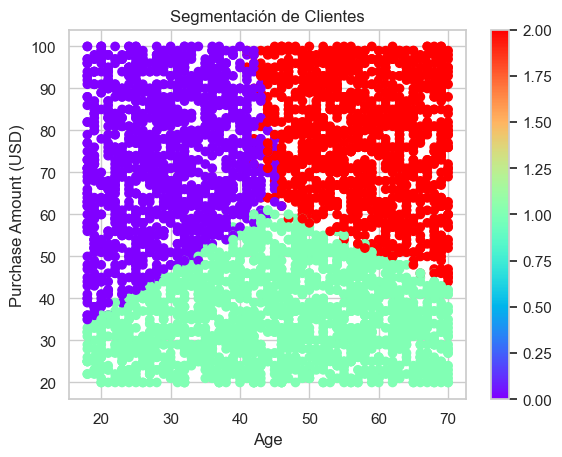

In [123]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Preparar datos para el clustering
features = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']
X = data[features]

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Usar K-Means para segmentar clientes
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)
data['Cluster'] = kmeans.labels_

# Visualizar la segmentación en un gráfico
plt.scatter(data['Age'], data['Purchase Amount (USD)'], c=data['Cluster'], cmap='rainbow')
plt.title('Segmentación de Clientes')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.colorbar()
plt.show()

# Mostrar la media de cada característica por cluster
#print(data.groupby('Cluster').mean()[features])

Los colores indican una clara separación de los clusters, lo que sugiere que el algoritmo K-Means pudo identificar y segmentar bien a los diferentes grupos de clientes basándose en sus características.

El gráfico muestra que hay diferencias claras en los hábitos de compra según la edad de los clientes. Mientras que los clientes jóvenes y mayores tienden a gastar cantidades más bajas en sus compras, los clientes de mediana edad gastan cantidades más elevadas. 

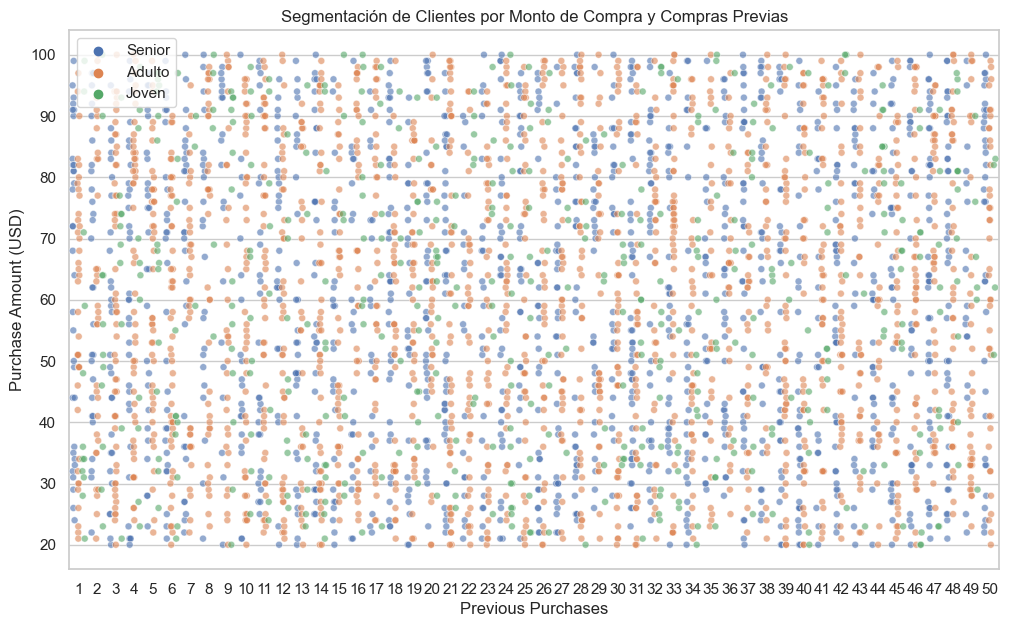

In [124]:
# Ajustar el estilo y tamaño del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Scatter plot con jitter y transparencia
sns.stripplot(x='Previous Purchases', y='Purchase Amount (USD)', hue='Age Group', data=data, jitter=0.2, alpha=0.6, dodge=True, marker='o', edgecolor='w', linewidth=0.5)

# Título y etiquetas
plt.title('Segmentación de Clientes por Monto de Compra y Compras Previas')
plt.legend(loc='upper left')
plt.show()

La segmentación de clientes según el monto de compra y las compras previas no muestra diferencias pronunciadas entre los grupos de edad en términos de comportamiento de compra. 

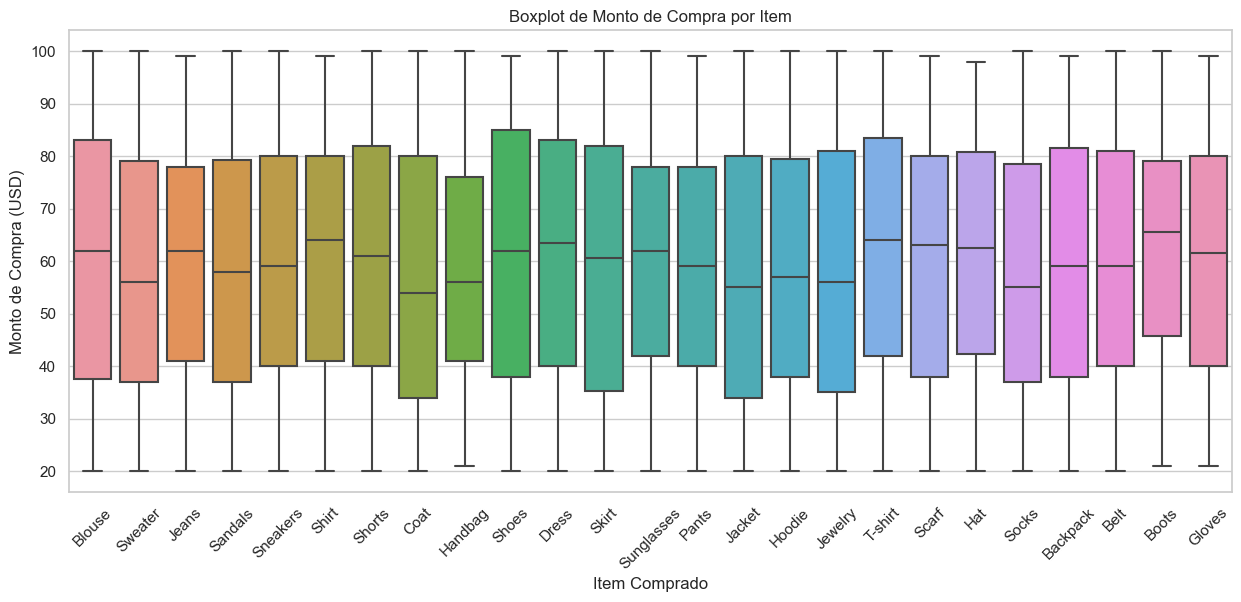

In [125]:
sns.set(style="whitegrid")

# Boxplot por Item Purchased
plt.figure(figsize=(15, 6))  # Ajusta el tamaño si tienes muchos items
sns.boxplot(x="Item Purchased", y="Purchase Amount (USD)", data=data)
plt.title("Boxplot de Monto de Compra por Item")
plt.ylabel("Monto de Compra (USD)")
plt.xlabel("Item Comprado")
plt.xticks(rotation=45)  # Rota las etiquetas si son muy largas
plt.show()

Este gráfico proporciona una visión detallada de la estructura de precios de diferentes artículos, permitiendo identificar tendencias en el coste y la variabilidad asociada con cada tipo de producto.

Rango de Precios: La mayoría de los artículos tienen un rango de precios que se sitúa entre los 40 y 80 USD, con algunas excepciones que tienen precios un poco más bajos o más altos.

No se observan valores atípicos (outliers) significativos en la mayoría de los artículos, lo que sugiere que la mayoría de las transacciones caen dentro de un rango de precios esperado para cada producto.

# ANÁLISIS ESTADÍSTICO

#### Análisis de Variabilidad (ANOVA) con el propósito de identificar factores significativos:

El propósito central de nuestro análisis es investigar qué variables o factores tienen un efecto significativo en la cantidad de dinero que un cliente gasta (representado por la columna Purchase_Amount_USD). Para lograr esto, estamos utilizando el análisis ANOVA.

In [126]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Renombrar columnas para eliminar espacios y caracteres especiales
data_anova = data.copy()
data_anova.columns = [col.replace(" ", "_").replace("(", "").replace(")", "") for col in data_anova.columns]

factores = ['Gender', 'Location', 'Size', 'Color', 'Season', 'Review_Rating', 'Subscription_Status', 'Shipping_Type', 'Discount_Applied', 'Promo_Code_Used', 'Payment_Method', 'Frequency_of_Purchases']

for factor in factores:
    modelo = ols(f'Purchase_Amount_USD ~ {factor}', data=data_anova).fit()
    anova_table = sm.stats.anova_lm(modelo, typ=2)
    print(f"\nANOVA para {factor}:\n", anova_table)



ANOVA para Gender:
                 sum_sq      df        F    PR(>F)
Gender    4.314218e+02     1.0  0.76898  0.380587
Residual  2.186899e+06  3898.0      NaN       NaN

ANOVA para Location:
                 sum_sq      df        F    PR(>F)
Location  3.485240e+04    49.0  1.27221  0.097332
Residual  2.152478e+06  3850.0      NaN       NaN

ANOVA para Size:
                 sum_sq      df         F    PR(>F)
Size      2.684963e+03     3.0  1.596081  0.188161
Residual  2.184645e+06  3896.0       NaN       NaN

ANOVA para Color:
                 sum_sq      df         F    PR(>F)
Color     1.968048e+04    24.0  1.465909  0.066607
Residual  2.167650e+06  3875.0       NaN       NaN

ANOVA para Season:
                 sum_sq      df         F    PR(>F)
Season    6.291399e+03     3.0  3.746118  0.010576
Residual  2.181039e+06  3896.0       NaN       NaN

ANOVA para Review_Rating:
                      sum_sq      df        F    PR(>F)
Review_Rating  2.071746e+03     1.0  3.69552  0.054632

Una vez que identificamos los factores significativos utilizando ANOVA, el próximo paso lógico es determinar qué valores específicos de esos factores afectan más la cantidad gastada. La prueba de Wilcoxon, que es una prueba no paramétrica, puede ayudarnos a hacer esto. Esta prueba compara las medianas de dos grupos y determina si difieren de manera significativa. Así, para los factores identificados como significativos en ANOVA, podemos realizar la prueba de Wilcoxon para comparar y determinar qué valores específicos tienen el mayor efecto en la cantidad gastada.

In [135]:
import pandas as pd
from scipy.stats import wilcoxon

# Lista de estaciones
seasons = data['Season'].unique()

results = {}

# Combinaciones de estaciones de dos en dos
for i in range(len(seasons)):
    for j in range(i+1, len(seasons)):
        season1 = seasons[i]
        season2 = seasons[j]
        
        # Filtrar datos para las dos estaciones actuales
        season1_data = data[data['Season'] == season1]['Purchase Amount (USD)']
        season2_data = data[data['Season'] == season2]['Purchase Amount (USD)']

        # Asegúrate de que las longitudes sean iguales para la prueba de Wilcoxon
        min_len = min(len(season1_data), len(season2_data))
        season1_data = season1_data.iloc[:min_len]
        season2_data = season2_data.iloc[:min_len]

        # Realizar la prueba de Wilcoxon
        stat, p = wilcoxon(season1_data, season2_data)

        # Almacenar resultados en el diccionario
        results[f"{season1} vs {season2}"] = (stat, p)

# Imprimir resultados
for key, value in results.items():
    print(f'Comparación {key}: Statistics={value[0]:.3f}, p={value[1]:.3f}')


Comparación Winter vs Spring: Statistics=212503.500, p=0.127
Comparación Winter vs Summer: Statistics=208260.000, p=0.078
Comparación Winter vs Fall: Statistics=223234.000, p=0.389
Comparación Spring vs Summer: Statistics=218917.000, p=0.922
Comparación Spring vs Fall: Statistics=207017.500, p=0.007
Comparación Summer vs Fall: Statistics=197367.500, p=0.003


No hay diferencias significativas en la cantidad de dinero gastado entre Winter y las otras estaciones (Spring, Summer, Fall).

Tampoco hay una diferencia significativa entre Spring y Summer.

Sin embargo, se encontró que hay diferencias significativas en la cantidad de dinero gastado entre Spring y Fall, así como entre Summer y Fall. Específicamente, las compras durante Fall tienden a diferir significativamente de las realizadas en Spring y Summer.

# MACHINE LEARNING

#### FEATURE SELECTION

In [4]:
# Impotamos librerías

import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
import random

# Ignoramos los warnings
warnings.filterwarnings("ignore")

# Añadimos una semilla para que los resultados sean reproducibles
random.seed(100)

In [5]:
# Obtenemos la matriz X e Y
df1 = pd.get_dummies(data, drop_first=True)
X = df1.drop('Purchase Amount (USD)', axis = 1).values
X = sm.add_constant(X)
Y = df1['Purchase Amount (USD)'].values
Y[Y == -1] = 0

# Eliminamos variables con varianza baja o nula
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(0.5)
X = selector.fit_transform(X)

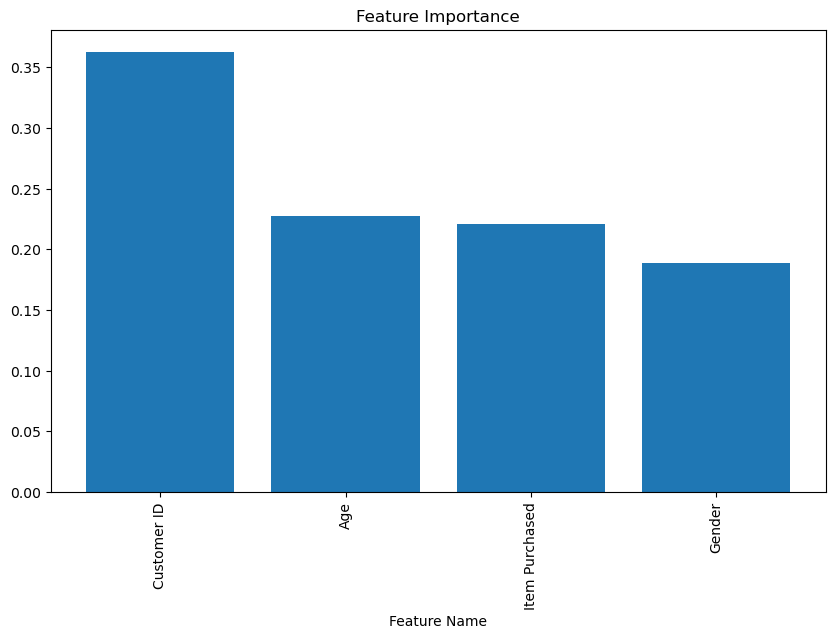

In [6]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X, Y)

# Obtener la importancia de características
feature_importance = rf_model.feature_importances_

# Crear un arreglo de índices para las características
feature_indices = np.arange(X.shape[1])

# Ordenar las características según su importancia
sorted_feature_indices = np.argsort(feature_importance)[::-1]

# Obtener los nombres de las características más representativas
top_feature_names = data.columns[sorted_feature_indices]

# Graficar la importancia de características
plt.figure(figsize=(10, 6))
plt.bar(top_feature_names, feature_importance[sorted_feature_indices])
plt.xticks(rotation=90)  # Rotar los nombres para evitar solapamientos
plt.xlabel('Feature Name')
plt.title('Feature Importance')
plt.show()


Aplicamos un modelo de Random Forest para poder encontrar las variables más significativas para poder predecir la cantidad de dinero en USD de cada compra.

Observamos en este caso que gender, customer ID, age y item purchased son las variables mas influyentes para realizar nuestro modelo predictivo.

#### Regresión Lineal

In [37]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Cargar tus datos
# df = pd.read_csv('tu_archivo.csv')

# Asegúrate de reemplazar esto con tus propias columnas
# Ejemplo: Supongamos que 'Y' es tu variable objetivo y el resto son características
df1 = pd.get_dummies(data, drop_first=True)
Y = df1['Purchase Amount (USD)']
X = df1.drop('Purchase Amount (USD)', axis=1)

# Convertir todas las columnas a float para evitar problemas de tipo
X = X.astype(float)
Y = Y.astype(float)

# Comprobar y manejar valores no numéricos o infinitos en X
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Reemplazar infinitos por NaN
X.fillna(X.mean(), inplace=True)  # Rellenar NaN con la media de la columna

# Añadir intercepto
X = sm.add_constant(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

# Modelo de regresión lineal con statsmodels
model = sm.OLS(Y_train, X_train).fit()

# Predicciones
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calcular RMSE
rmse_train = np.sqrt(mean_squared_error(Y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(Y_test, y_pred_test))

print("RMSE en el conjunto de entrenamiento: ", rmse_train)
print("RMSE en el conjunto de prueba: ", rmse_test)

# Asumiendo que p es el número total de características
n, p = X_train.shape

# Asegúrate de que estos arreglos tengan el tamaño correcto
rmse_train_k = np.zeros(p-1)  # Menos uno porque empezamos desde 1 característica hasta p-1
rmse_test_k = np.zeros(p-1)

for k in range(1, p):
    model_k = sm.OLS(Y_train, X_train.iloc[:, :k]).fit()
    y_pred_train_k = model_k.predict(X_train.iloc[:, :k])
    y_pred_test_k = model_k.predict(X_test.iloc[:, :k])
    rmse_train_k[k-1] = np.sqrt(mean_squared_error(Y_train, y_pred_train_k))
    rmse_test_k[k-1] = np.sqrt(mean_squared_error(Y_test, y_pred_test_k))

# Ahora length y rmse_* tendrán la misma longitud
length = range(1, p)




RMSE en el conjunto de entrenamiento:  22.928434398751182
RMSE en el conjunto de prueba:  24.47916467766069


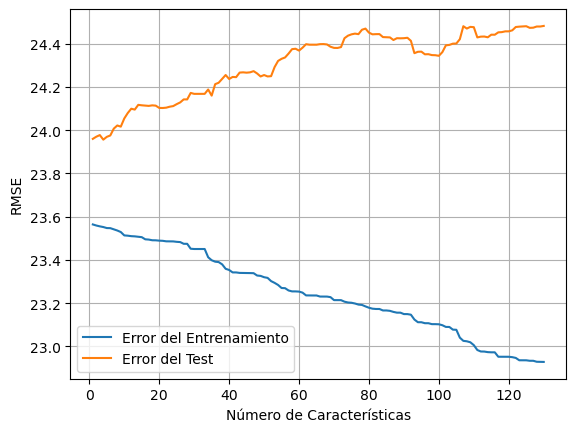

In [38]:
plt.plot(length, rmse_train_k, label='Error del Entrenamiento')
plt.plot(length, rmse_test_k, label='Error del Test')
plt.legend()
plt.xlabel("Número de Características")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

El modelo de regresión lineal ha sido evaluado en función de su error cuadrático medio (RMSE) para los conjuntos de entrenamiento y prueba. En el conjunto de entrenamiento, el RMSE fue de aproximadamente 22.93, mientras que para el conjunto de prueba fue de 24.48.

Esta diferencia sugiere que el modelo es capaz de generalizar razonablemente bien a nuevos datos, aunque hay un ligero aumento en el error al pasar de la muestra de entrenamiento a la de prueba, lo que es un indicativo de sobreajuste moderado.

Al observar la evolución del RMSE en relación con el número de características, se puede apreciar que el modelo mejora su rendimiento en el conjunto de entrenamiento a medida que se incrementa el número de características, lo cual es esperado, ya que puede capturar más información de los datos. No obstante, el rendimiento en el conjunto de prueba comienza a empeorar después de cierto punto, lo que indica que añadir más características más allá de este umbral no aporta beneficios y, de hecho, puede estar contribuyendo a una mayor varianza y, por tanto, a un sobreajuste.

#### Lasso

In [39]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

# Modelo de regresión de Lasso y comprobamos las variables más importantes
mL = LassoCV(cv=5).fit(X_train, Y_train)

ypred_train = mL.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(Y_train, ypred_train))

ypred_test = mL.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(Y_test, ypred_test))

print("RMSE en el conjunto de entrenamiento: ", rmse_train)
print("RMSE en el conjunto de prueba: ", rmse_test)

betas = mL.coef_
n_features = sum(abs(betas) > 0)
print("Número de features con Lasso: ", n_features)
print("Features seleccionadas por Lasso: ", np.where(abs(betas) > 0)[0])


RMSE en el conjunto de entrenamiento:  23.550827894124506
RMSE en el conjunto de prueba:  23.987711301427854
Número de features con Lasso:  3
Features seleccionadas por Lasso:  [1 2 4]


El RMSE para el conjunto de entrenamiento se situó en 23.55, mientras que para el conjunto de prueba fue ligeramente superior, con un valor de 23.99. La proximidad de estos dos valores sugiere que el modelo Lasso ha generalizado bien a los datos no vistos, con una variación mínima entre los errores de entrenamiento y prueba, lo cual es indicativo de un buen equilibrio entre sesgo y varianza y una menor tendencia al sobreajuste en comparación con la regresión lineal.

#### Elastic Net

In [40]:
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Es importante estandarizar las características al usar regularización
# Vamos a crear un pipeline que primero estandariza las características y luego aplica ElasticNet
pipeline = make_pipeline(StandardScaler(), ElasticNetCV(cv=5, random_state=0))

# Ajustar el modelo ElasticNetCV al conjunto de entrenamiento
pipeline.fit(X_train, Y_train)

# Obtener el modelo ElasticNet después de ajustar
model_elastic = pipeline.named_steps['elasticnetcv']

# Predicciones
ypred_train = pipeline.predict(X_train)
ypred_test = pipeline.predict(X_test)

# Calcular RMSE
rmse_train = np.sqrt(mean_squared_error(Y_train, ypred_train))
rmse_test = np.sqrt(mean_squared_error(Y_test, ypred_test))

print("RMSE en el conjunto de entrenamiento: ", rmse_train)
print("RMSE en el conjunto de prueba: ", rmse_test)

# Mejores parámetros de regularización encontrados
print("Mejor valor de alpha: ", model_elastic.alpha_)
print("Mejor relación L1 (l1_ratio): ", model_elastic.l1_ratio_)


RMSE en el conjunto de entrenamiento:  23.55453409431229
RMSE en el conjunto de prueba:  23.958217897330794
Mejor valor de alpha:  2.2680063180904177
Mejor relación L1 (l1_ratio):  0.5


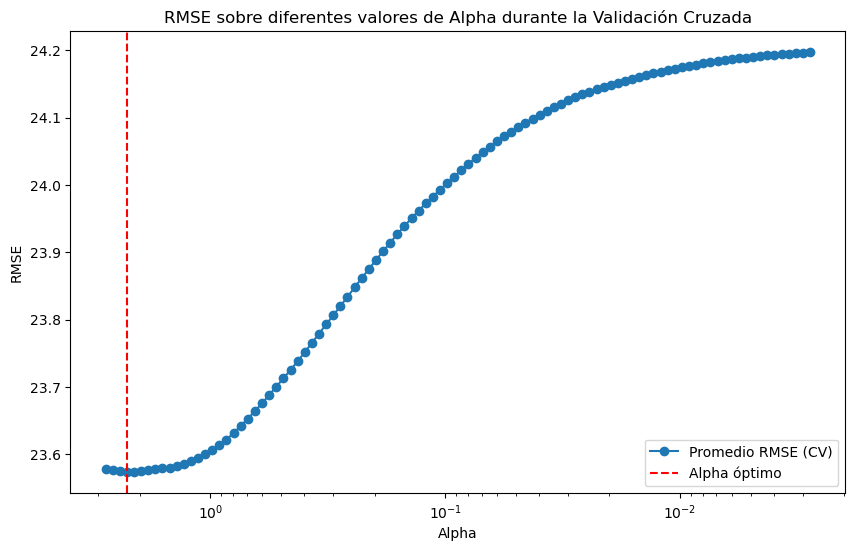

In [41]:
import matplotlib.pyplot as plt

# Obtener los valores de alpha probados y los errores medios correspondientes de la validación cruzada
alphas = model_elastic.alphas_
mse_path = model_elastic.mse_path_

# Calcular el RMSE promedio para cada valor de alpha durante la CV
rmse_path = np.sqrt(mse_path.mean(axis=1))

# Gráfico de RMSE sobre diferentes valores de alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, rmse_path, '-o', label='Promedio RMSE (CV)')

# Marcar el mejor alpha encontrado
plt.axvline(model_elastic.alpha_, linestyle='--', color='red', label='Alpha óptimo')

# Invertir el eje x porque los valores de alpha van en decremento
plt.xscale('log')  # Alphas se distribuyen logarítmicamente
plt.gca().invert_xaxis()

# Añadir leyenda y etiquetas
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE sobre diferentes valores de Alpha durante la Validación Cruzada')
plt.show()


La implementación de Elastic Net ha producido resultados prometedores, con un RMSE en el conjunto de entrenamiento de aproximadamente 23.55 y un RMSE en el conjunto de prueba de aproximadamente 23.96. La cercanía de estos dos valores indica que el modelo ha logrado generalizar bien a los datos de prueba y está proporcionando una consistencia en su capacidad predictiva, sin signos evidentes de sobreajuste.

El RMSE varía con los diferentes valores de alpha durante el proceso de validación cruzada, con el RMSE más bajo y, por lo tanto, el mejor rendimiento alcanzado en el alpha óptimo marcado. Este punto minimiza el error de validación cruzada, y el modelo asociado a este alpha es el que se elige como el más adecuado para los datos.

#### Random Forest

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Selecting features and target variable
X = data[['Age', 'Gender', 'Location', 'Category']]
y = data['Purchase Amount (USD)']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age']),
        ('cat', OneHotEncoder(drop='first'), ['Gender', 'Location', 'Category'])
    ])

# Creating a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Training the model
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse


26.204308229955032

El modelo empleado es Random Forest:

Para el entrenamiento del modelo, se seleccionaron características como la edad, género, ubicación y categoría del producto para predecir el monto de compra. Antes de entrenar el modelo, las características numéricas se estandarizaron (para tener una escala común) y las características categóricas se codificaron mediante una técnica llamada "One Hot Encoding". Esta preparación de datos es crucial para que el modelo pueda interpretar correctamente las características y dar predicciones precisas.

Una vez que el modelo fue entrenado con el conjunto de entrenamiento, se utilizó para hacer predicciones en el conjunto de prueba. El error cuadrático medio (MSE) entre las predicciones y los valores reales fue calculado, y su raíz cuadrada (RMSE) resultó ser 26.199 USD, lo que indica la dispersión típica de los errores que el modelo hace en sus predicciones.

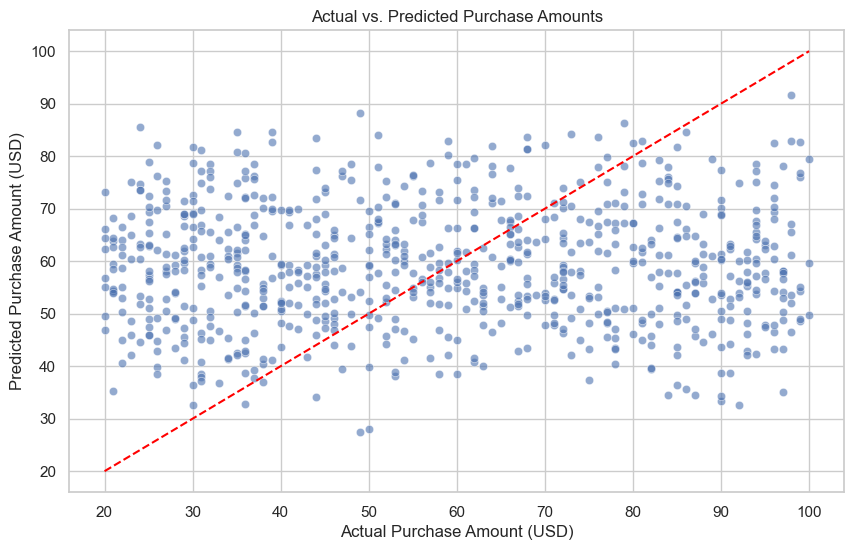

In [146]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs. Predicted Purchase Amounts')
plt.xlabel('Actual Purchase Amount (USD)')
plt.ylabel('Predicted Purchase Amount (USD)')
plt.grid(True)
plt.show()

El gráfico muestra que, aunque hay una dispersión en las predicciones (puntos azules) alrededor de la línea diagonal roja (que representa la predicción perfecta), el modelo tiene un rendimiento razonable, ya que muchos puntos están cerca de esta línea. Sin embargo, hay espacio para mejorar, ya que un RMSE de 26.199 puede ser significativo dependiendo del contexto del negocio y del rango de cantidades de compra que se manejen.

<Figure size 800x600 with 0 Axes>

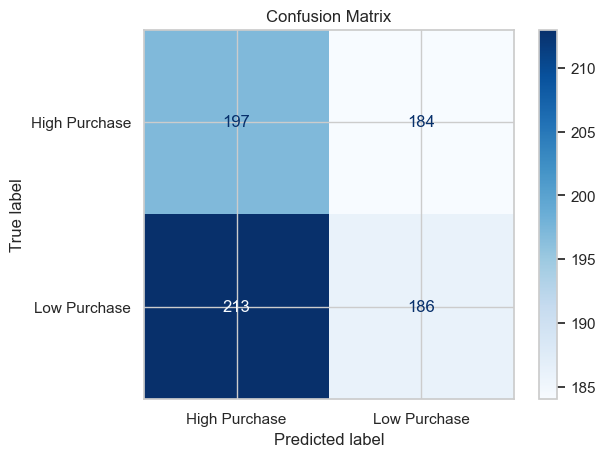

In [147]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the threshold using the median of y_test
threshold = np.median(y_test)

# Convert actual and predicted values to classes
y_test_class = np.where(y_test > threshold, "High Purchase", "Low Purchase")
y_pred_class = np.where(y_pred > threshold, "High Purchase", "Low Purchase")

# Compute the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class, labels=["High Purchase", "Low Purchase"])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm, display_labels=["High Purchase", "Low Purchase"]).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

El gráfico muestra la matriz de confusión de un modelo de clasificación que ha sido adaptado para predecir si un cliente realizará una "High Purchase" (compra alta) o una "Low Purchase" (compra baja) basado en ciertas características. La decisión de qué constituye una "High Purchase" o "Low Purchase" se determina utilizando la mediana de y_test como umbral.

197 casos fueron correctamente clasificados como "High Purchase" (verdaderos positivos).

186 casos fueron correctamente clasificados como "Low Purchase" (verdaderos negativos).

213 casos que en realidad eran "Low Purchase" fueron incorrectamente clasificados como "High Purchase" (falsos positivos).

184 casos que en realidad eran "High Purchase" fueron incorrectamente clasificados como "Low Purchase" (falsos negativos).

Esto indica que el modelo tiene una precisión moderada en la clasificación, ya que hay un número considerable tanto de verdaderos positivos como de verdaderos negativos. Sin embargo, también hay un número significativo de falsos positivos y falsos negativos, lo que sugiere que hay margen significativo de mejora.


In [148]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best estimator
best_pipeline = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_pipeline.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)

rmse_best

Fitting 5 folds for each of 108 candidates, totalling 540 fits


23.760947888643468

El resultado del RMSE (Root Mean Square Error) para el modelo optimizado es de aproximadamente 23.76 USD. Esto significa que, en promedio, las predicciones del modelo difieren en aproximadamente 23.76 USD respecto a los valores reales. Este valor proporciona una medida de la precisión del modelo y puede utilizarse como referencia para comparar con otros modelos o para evaluar mejoras futuras.

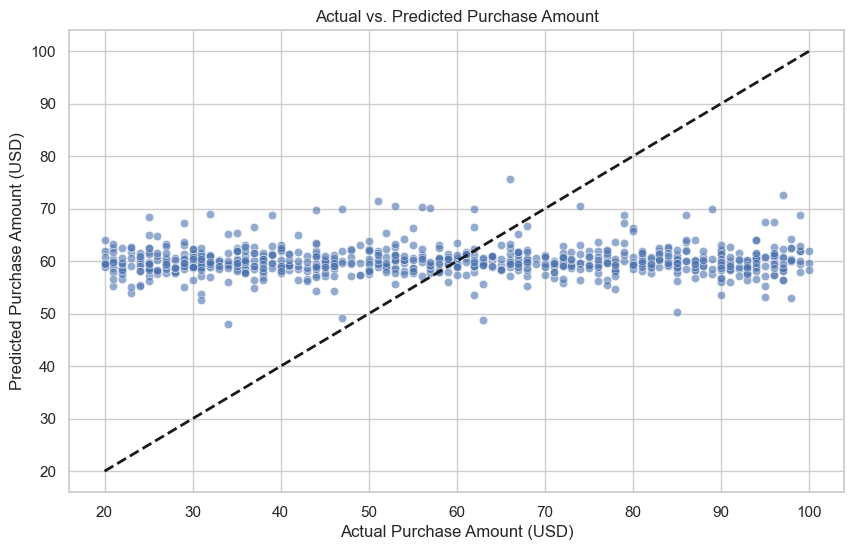

In [149]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Purchase Amount (USD)')
plt.ylabel('Predicted Purchase Amount (USD)')
plt.title('Actual vs. Predicted Purchase Amount')
plt.grid(True)
plt.show()

Desde el gráfico, podemos hacer las siguientes observaciones:

Hay una acumulación de puntos alrededor de la región de 60-70 USD en la cantidad predicha, independientemente de la cantidad de compra real. Esto sugiere que el modelo tiende a predecir valores dentro de ese rango con frecuencia.

El modelo parece tener un desempeño moderado para valores reales que se encuentran entre 50-80 USD, ya que muchos puntos se encuentran cerca de la línea diagonal en ese rango.

Para valores reales por debajo de 50 USD y por encima de 80 USD, el modelo no predice tan precisamente, ya que los puntos se alejan de la línea diagonal.

In [150]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR


# Codificación one-hot para todas las columnas categóricas
data_encoded = pd.get_dummies(data, drop_first=True)

# Ahora, todas tus columnas categóricas, como 'Sweater', 'Shirt', etc., serán convertidas en columnas numéricas.

# Separar las características y la variable objetivo
X = data_encoded.drop('Purchase Amount (USD)', axis=1)  # Asume que este es el nombre de tu columna objetivo
y = data_encoded['Purchase Amount (USD)']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline que primero escale los datos y luego aplique SVR
pipeline = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Calcular RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")


RMSE: 23.65843821519299


El RMSE (Root Mean Square Error) para el modelo SVR es aproximadamente 23.66 USD. Es casi similar al del modelo anterior, pero es ligeramente menor, lo que indica que el SVR puede estar realizando predicciones ligeramente más precisas.

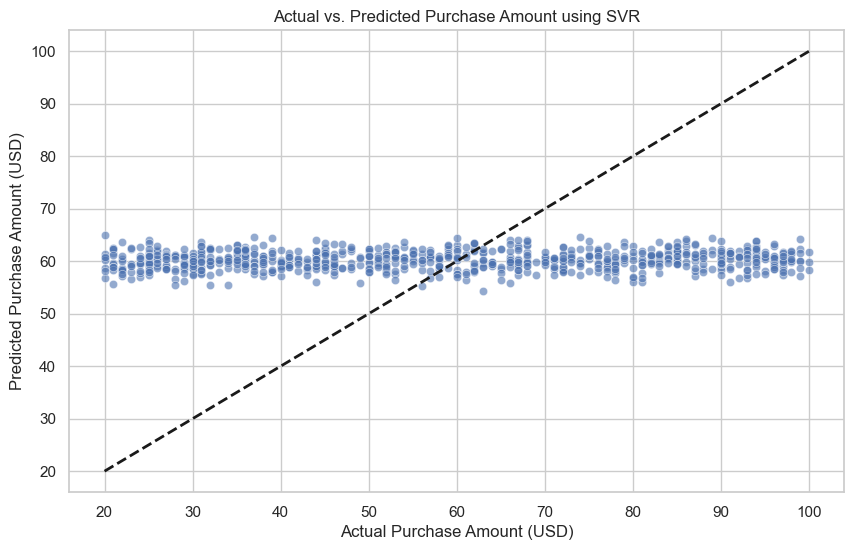

In [151]:
# Representación gráfica de las predicciones vs. valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Purchase Amount (USD)')
plt.ylabel('Predicted Purchase Amount (USD)')
plt.title('Actual vs. Predicted Purchase Amount using SVR')
plt.grid(True)
plt.show()


Basándonos en el gráfico, podemos hacer las siguientes observaciones:

El modelo SVR también muestra una concentración de puntos en torno a la región de 60-70 USD en las cantidades predichas, similar al modelo anterior.
A diferencia del modelo anterior, parece haber menos dispersión de puntos alrededor de la línea diagonal, lo que sugiere que el SVR podría estar realizando predicciones más consistentes, especialmente en el rango de 50-80 USD.

## CONCLUSIONES

En la etapa inicial de este estudio, hemos realizado un análisis exploratorio con el propósito de descifrar interacciones, tendencias y conexiones entre un conjunto de variables, poniendo un énfasis particular en cómo el dinero gastado en USD se relaciona e influye en otras variables.

Hemos recurrido a pruebas estadísticas como Anova y Wilcoxon para discernir cuáles variables tenían un impacto más significativo y representativo en el total de gastos. Completando esta fase preliminar con el uso del algoritmo Random Forest, que sirvió para validar y esclarecer las variables con mayor relevancia en la predicción del gasto.

Los datos revelaron patrones consistentes en ciertas categorías. Por ejemplo, en la categoría de ropa y accesorios, se evidenció una tendencia clara en el gasto a medida que la edad del consumidor avanza. Hemos detectado, además, variaciones notables en los hábitos de compra al comparar géneros y distintas regiones geográficas.

En la fase siguiente, dedicada a la modelización, hemos explorado y evaludado varios modelos de regresión con el objetivo de predecir el total gastado en USD. Aunque se observaron avances en la precisión al refinar la selección de variables, el modelo Máquinas de Vectores de Soporte (SVR) destacó por su precisión, alcanzando un RMSE de 23.66 USD.

Sin embargo, es crucial señalar que, a pesar de los esfuerzos y técnicas aplicadas, la naturaleza de los datos presenta desafíos. Los modelos de aprendizaje automático han revelado la complejidad y la dificultad de identificar patrones claros y consistentes. Por lo tanto, la predicción precisa de las ventas sigue siendo un reto complejo ante la heterogeneidad y diversidad de los datos.